# Question 1 

## A

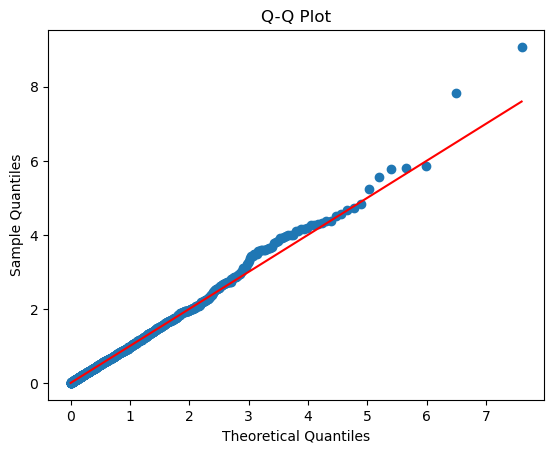

Chi Squared: 28582.939999999988


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parameters
SEED = 1
MEAN = 1.0
SAMPLES = 1000
CLASS_INTERVALS = 30
MULTIPLE = 5.0

np.random.seed(SEED)

def exponential(rand, mean):
    return (-1.0 * mean) * np.log(rand)

def inverse_exponential(rand, mean):
    return (-1.0 * np.log(1.0 - rand)) / mean

def float_sort(arr):
    return sorted(arr)

def qq_plot(data, mean):
    n = len(data)
    theoretical_quantiles = -np.log(1.0 - (np.arange(n) + 0.5) / n) / mean

    plt.scatter(theoretical_quantiles, np.sort(data))
    plt.plot([np.min(theoretical_quantiles), np.max(theoretical_quantiles)],
             [np.min(theoretical_quantiles), np.max(theoretical_quantiles)], color='red')
    plt.title("Q-Q Plot")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.show()

# Generate exponential random variates
rand_nums = np.random.rand(SAMPLES)
values = np.zeros((SAMPLES, 2))

for i in range(SAMPLES):
    values[i, 0] = exponential(rand_nums[i], MEAN)
    values[i, 1] = 0.0

# Sort the values
values = values[values[:, 0].argsort()]

# Calculate inverse exponential for Q-Q plot
num_for_inverse = (np.arange(SAMPLES) + 0.5) / SAMPLES
values[:, 1] = inverse_exponential(num_for_inverse, MEAN)

# Q-Q Plot
qq_plot(values[:, 0], MEAN)

# Calculate mean and variance
mean_val = np.mean(values[:, 0])
variance_val = np.var(values[:, 0], ddof=1)


# Chi-Square Test
intervals, bin_edges = np.histogram(values[:, 0], bins=np.linspace(0, CLASS_INTERVALS * MULTIPLE, CLASS_INTERVALS + 1))

expected_frequency = SAMPLES / CLASS_INTERVALS

chi_squared = np.sum((intervals - expected_frequency) ** 2 / expected_frequency)

print(f"Chi Squared: {chi_squared}")

# Critical values for significance levels
alpha_values = [0.05, 0.10, 0.01]


## B

In [44]:
print(f"Mean: {mean_val}")
print(f"Variance: {variance_val}")

Mean: 1.0139798932207744
Variance: 1.109902864559078


## C and D

In [49]:
for alpha in alpha_values:
    critical_value = chi2.ppf(1 - alpha, CLASS_INTERVALS - 1)
    print(f"Critical Value for α = {alpha}: {critical_value}")
    if alpha == 0.05:
        if critical_value > 43.8:
            print("Reject the null hypothesis")
        else:
            print("Fail to reject the null hypothesis")
    elif alpha == 0.1:
        if critical_value > 40.3:
            print("Reject the null hypothesis")
        else:
            print("Fail to reject the null hypothesis")
    else:
        if critical_value > 50.9:
            print("Reject the null hypothesis")
        else:
            print("Fail to reject the null hypothesis")

Critical Value for α = 0.05: 42.55696780429269
Fail to reject the null hypothesis
Critical Value for α = 0.1: 39.08746977069396
Fail to reject the null hypothesis
Critical Value for α = 0.01: 49.58788447289881
Fail to reject the null hypothesis


# Question 2

# A

In [1]:
from scipy.stats import poisson
from tabulate import tabulate

# Your data
data = [
    ["0", 35],
    ["1", 40],
    ["2", 13],
    ["3", 6],
    ["4", 4],
    ["5", 1],
    ["6", 1]
]

# Total number of months
n = sum([item[1] for item in data])

# Calculate lambda (average number of events in a unit of time)
lambda_val = sum([int(item[0]) * item[1] for item in data]) / n

# Calculate expected frequencies (Ei)
expected_frequencies = [poisson.pmf(int(item[0]), lambda_val) * n for item in data]

# Add the expected frequencies (Ei) to the data
for i in range(len(data)):
    data[i].append(expected_frequencies[i])

# Calculate the new column (Observed Frequency - Expected Frequency (Ei))^2 / Expected Frequency (Ei)
chi_square_contributions = [(item[1] - item[2])**2 / item[2] for item in data]

# Add the new column to the data
for i in range(len(data)):
    data[i].append(chi_square_contributions[i])

# Calculate the chi-square statistic
chi_square_statistic = sum(chi_square_contributions)

# Degrees of freedom (k - 1, where k is the number of categories)
degrees_of_freedom = len(data) - 1

# Significance level
alpha = 16.8

# Print the results using tabulate
table_headers = ["Injuries per month", "Obs Fre", "(Ei)", "(Observed - Expected)^2 / Expected"]
table = tabulate(data, headers=table_headers, tablefmt="grid", floatfmt=".4f")  # Formatting float numbers

print(table)
print("\nChi-square Statistic:", chi_square_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("Significance Level (α):", alpha)

# Check if the null hypothesis is rejected
if chi_square_statistic > alpha:
    print("\nReject the null hypothesis. The underlying distribution is not Poisson.")
else:
    print("\nFail to reject the null hypothesis. The underlying distribution is Poisson.")


+----------------------+-----------+---------+--------------------------------------+
|   Injuries per month |   Obs Fre |    (Ei) |   (Observed - Expected)^2 / Expected |
+======================+===========+=========+======================================+
|                    0 |        35 | 32.9559 |                               0.1268 |
+----------------------+-----------+---------+--------------------------------------+
|                    1 |        40 | 36.5810 |                               0.3195 |
+----------------------+-----------+---------+--------------------------------------+
|                    2 |        13 | 20.3025 |                               2.6266 |
+----------------------+-----------+---------+--------------------------------------+
|                    3 |         6 |  7.5119 |                               0.3043 |
+----------------------+-----------+---------+--------------------------------------+
|                    4 |         4 |  2.0846 |        

## B

In [5]:
from scipy.stats import poisson
from tabulate import tabulate

# Your data
data = [
    ["0", 35],
    ["1", 40],
    ["2", 13],
    ["3", 6],
    ["4", 4],
    ["5", 1],
    ["6", 1]
]

# Total number of months
n = sum([item[1] for item in data])

# New mean for Poisson distribution
new_mean = 1.0

# Calculate expected frequencies (Ei) based on the new mean
expected_frequencies = [poisson.pmf(int(item[0]), new_mean) * n for item in data]

# Add the expected frequencies (Ei) to the data
for i in range(len(data)):
    data[i].append(expected_frequencies[i])

# Calculate the new column (Observed Frequency - Expected Frequency (Ei))^2 / Ei
chi_square_contributions = [(item[1] - item[2])**2 / item[2] for item in data]

# Add the new column to the data
for i in range(len(data)):
    data[i].append(chi_square_contributions[i])
    
chi_square_statistic = sum(chi_square_contributions)

# Print the results using tabulate
table_headers = ["Injuries per Month", "Obse Fre", "Ei  ", "(Observed - Expected)^2 / Expected"]
table = tabulate(data, headers=table_headers, tablefmt="grid", floatfmt=".4f")  # Formatting float numbers

print(table)
print("\nChi-square Statistic:", chi_square_statistic)
print("Degrees of Freedom:", degrees_of_freedom)
print("Significance Level (α):", alpha)
if chi_square_statistic > alpha:
    print("\nReject the null hypothesis. The underlying distribution is not Poisson.")
else:
    print("\nFail to reject the null hypothesis. The underlying distribution is Poisson.")


+----------------------+------------+---------+--------------------------------------+
|   Injuries per Month |   Obse Fre |    Ei   |   (Observed - Expected)^2 / Expected |
+======================+============+=========+======================================+
|                    0 |         35 | 36.7879 |                               0.0869 |
+----------------------+------------+---------+--------------------------------------+
|                    1 |         40 | 36.7879 |                               0.2805 |
+----------------------+------------+---------+--------------------------------------+
|                    2 |         13 | 18.3940 |                               1.5818 |
+----------------------+------------+---------+--------------------------------------+
|                    3 |          6 |  6.1313 |                               0.0028 |
+----------------------+------------+---------+--------------------------------------+
|                    4 |          4 |  1.53

## C

Part (a): Assumes that the Poisson distribution's rate parameter (lambda) is estimated from the data itself. It tests the general fit of the data to a Poisson distribution.

Part (b): Specifies a fixed mean value for the Poisson distribution (mean = 1.0). It tests whether the observed data matches a Poisson distribution with a predefined mean.

When each case might arise:

Use Part (a) when you want to assess if the observed data follows a Poisson distribution, without assuming a specific mean.

Use Part (b) when you have a prior expectation or knowledge about the mean of the Poisson distribution and want to test if the observed data fits that specific Poisson distribution with the given mean.

# Question 3

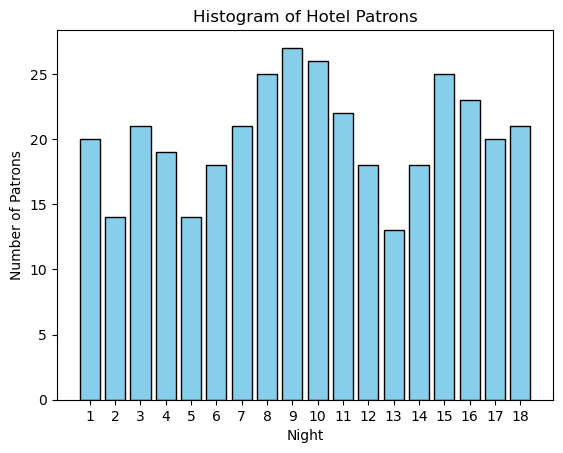

In [82]:
import matplotlib.pyplot as plt

data = [20, 14, 21, 19, 14, 18, 21, 25, 27, 26, 22, 18, 13, 18, 25, 23, 20, 21]

# Plotting the vertical bar chart with switched axes and custom x-axis values
plt.bar(range(1, len(data) + 1), data, color='skyblue', edgecolor='black')  # Use bar instead of barh
plt.title('Histogram of Hotel Patrons')
plt.xlabel('Night')
plt.ylabel('Number of Patrons')
plt.xticks(range(1, len(data) + 1))  # Set x-axis ticks to represent each night
plt.show()

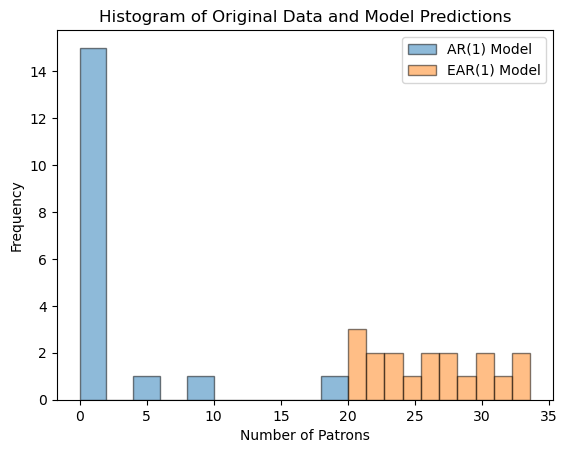

AR(1) Parameter (phi): 0.46179417921513655
EAR(1) Parameter (phi): 1.0310030290175667


In [87]:
import numpy as np
import matplotlib.pyplot as plt

data = [20, 14, 21, 19, 14, 18, 21, 25, 27, 26, 22, 18, 13, 18, 25, 23, 20, 21]

# Function to fit AR(1) model
def fit_ar1(data):
    phi = np.corrcoef(data[1:], data[:-1])[0, 1]
    return phi

# Function to fit EAR(1) model
def fit_ear1(data):
    data = np.array(data)
    phi = np.mean(data[1:] / data[:-1])
    return phi

# Calculate parameters
phi_ar1 = fit_ar1(data)
phi_ear1 = fit_ear1(data)

# Generate values for AR(1) and EAR(1) models
ar1_values = [data[0]]
ear1_values = [data[0]]
for i in range(1, len(data)):
    ar1_values.append(phi_ar1 * ar1_values[-1])
    ear1_values.append(phi_ear1 * ear1_values[-1])

# Plot histograms
plt.hist(ar1_values, bins=10, edgecolor='black', alpha=0.5, label='AR(1) Model')
plt.hist(ear1_values, bins=10, edgecolor='black', alpha=0.5, label='EAR(1) Model')

plt.title('Histogram of Original Data and Model Predictions')
plt.xlabel('Number of Patrons')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f'AR(1) Parameter (phi): {phi_ar1}')
print(f'EAR(1) Parameter (phi): {phi_ear1}')



The AR provides a better fit for this data.

## Question 4

## A

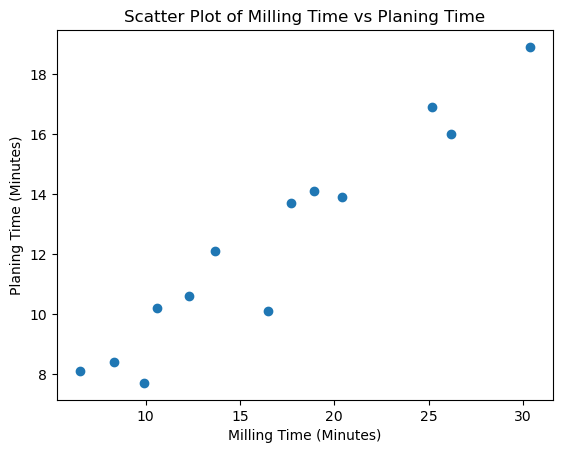

In [89]:
import matplotlib.pyplot as plt

# Data
milling_time = [12.3, 20.4, 18.9, 16.5, 8.3, 6.5, 25.2, 17.7, 10.6, 13.7, 26.2, 30.4, 9.9]
planing_time = [10.6, 13.9, 14.1, 10.1, 8.4, 8.1, 16.9, 13.7, 10.2, 12.1, 16.0, 18.9, 7.7]

# Scatter plot
plt.scatter(milling_time, planing_time)
plt.title('Scatter Plot of Milling Time vs Planing Time')
plt.xlabel('Milling Time (Minutes)')
plt.ylabel('Planing Time (Minutes)')
plt.show()


As the milling time increases, th eplanning time also increases. So thewre is a positive correlation between the milling time and planning time, So they are dependent

## B

In [91]:
import numpy as np

# Given values
mu1 = 17.732
mu2 = 13.06
ex1ex2 = 253.5168
sigma1 = 6.7111052244
sigma2 = 3.5614837732

# Calculate covariance
cov_x1x2 = ex1ex2 - mu1 * mu2

# Calculate correlation coefficient
rho = cov_x1x2 / (sigma1 * sigma2)

print(f'cov(X1, X2) = {cov_x1x2:.3f}')
print(f'Correlation Coefficient (rho) = {rho:.3f}')

# Interpretation
if abs(rho) >= 0.7:
    print('Therefore, there is a strong linear relationship.')
else:
    print('The linear relationship is not considered strong.')


cov(X1, X2) = 21.937
Correlation Coefficient (rho) = 0.918
Therefore, there is a strong linear relationship.


## C

Method to fit bivariate normal distribution is as follows;  
Step 1. Generate $Z_1$ and $Z_2$, which are  two independent standard normal random variables.  
Step 2. Set $X_1 = \mu_1 + \sigma_1Z_1$  
Step 3. Set $X_2 = \mu_2 + \sigma_2(\rho Z_1 + Z_2\sqrt{1-\rho^2})$  
Step 4. Fir X1 and X2 using a plot

# Question 5

## Seeds

* 1234 
* 5678 
* 9012 
* 3456 
* 7890 
* 2345 
* 6789 
* 0123 
* 4567 
* 8901

SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         8.078635305984443  
        MEAN SERVICE TIME                              4.008871125724779  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.8892934574228768
        MAXIMUM LINE LENGTH                            41392.0
        AVERAGE RESPONSE TIME (w)                      4933.009619506037  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.99452
        SIMULATION RUNLENGTH                           36720.358531801015 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         13.255911571493272  
        MEAN SERVICE TIME                              6.009250581753168  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.8052832454217648
        MAXIMUM LINE LENGTH                            40742.0
        AVERAGE RESPONSE TIME (w)                      10855.427098910446  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.8028
        SIMULATION RUNLENGTH                           55232.23959104743 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         17.537820394886108  
        MEAN SERVICE TIME                              8.00259097673416  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7527366962033541
        MAXIMUM LINE LENGTH                            25087.0
        AVERAGE RESPONSE TIME (w)                      7263.220352886798  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.7288
        SIMULATION RUNLENGTH                           67453.42099122524 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN   
        MEAN INTERARRIVAL TIME                         21.32001351148057  
        MEAN SERVICE TIME                              9.982869002241346 
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7299322696587237
        MAXIMUM LINE LENGTH                            16252.0
        AVERAGE RESPONSE TIME (w)                      11542.78540925599  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.63398
        SIMULATION RUNLENGTH                           76142.14850978513 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN    
        MEAN INTERARRIVAL TIME                         24.848512370620913  
        MEAN SERVICE TIME                              11.98360445836492  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7234899508610002
        MAXIMUM LINE LENGTH                            11518.0
        AVERAGE RESPONSE TIME (w)                      -2700.920042449768  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.58562
        SIMULATION RUNLENGTH                           82827.87746617458 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         28.43136944931167  
        MEAN SERVICE TIME                              13.986945048525081  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7208044286160372
        MAXIMUM LINE LENGTH                            13058.0
        AVERAGE RESPONSE TIME (w)                      7988.582261719132  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.85014
        SIMULATION RUNLENGTH                           88847.9595972895 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN   
        MEAN INTERARRIVAL TIME                         31.816591048389018  
        MEAN SERVICE TIME                              15.987834351274577  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7152607441639038
        MAXIMUM LINE LENGTH                            9212.0
        AVERAGE RESPONSE TIME (w)                      7344.442795450375  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.52514
        SIMULATION RUNLENGTH                           93578.5390568466 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         35.10930302137652  
        MEAN SERVICE TIME                              17.99453452851332  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7049583004475087
        MAXIMUM LINE LENGTH                            6886.0
        AVERAGE RESPONSE TIME (w)                      1720.3419454580758  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.43478
        SIMULATION RUNLENGTH                           97524.55647323947 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN 
        MEAN INTERARRIVAL TIME                         39.09061003961698  
        MEAN SERVICE TIME                              20.00374635067096  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7167313301377292
        MAXIMUM LINE LENGTH                            19436.0
        AVERAGE RESPONSE TIME (w)                      -11334.551949693518  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.40102
        SIMULATION RUNLENGTH                           102869.22799638673 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         42.765427848617605  
        MEAN SERVICE TIME                              21.995006985305594  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7042585596395123
        MAXIMUM LINE LENGTH                            13825.0
        AVERAGE RESPONSE TIME (w)                      2165.547550784037  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.38552
        SIMULATION RUNLENGTH                           106913.38051135997 MINUTES
        NUMBER OF DEPARTURES                           50000

## A

a. Point Estimator for Delay: 4.626442975092127  
   Confidence Interval: [2.0006428477990785, 7.252243102385176]  
   Prediction Interval: [4.126442975092127, 5.126442975092127]  

## B

b. Is Simulation Data Consistent with System Behavior?  
   Observed Delay: 5.0  
   Prediction Interval for Observed Delay: [4.5, 5.5]  

## C

SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         31.44916292084833  
        MEAN SERVICE TIME                              22.033501842261753  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.6990438150480711
        MAXIMUM LINE LENGTH                            204.0
        AVERAGE RESPONSE TIME (w)                      20.18824591397968  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.98712
        SIMULATION RUNLENGTH                           142950.61010240484 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN   
        MEAN INTERARRIVAL TIME                         34.29860343540226  
        MEAN SERVICE TIME                              24.03011234596094  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.700680726608307
        MAXIMUM LINE LENGTH                            25.0
        AVERAGE RESPONSE TIME (w)                      -11.728704947919189  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.9831
        SIMULATION RUNLENGTH                           142476.48236049165 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         37.14614103903372  
        MEAN SERVICE TIME                              26.027759424417233  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7015135815449091
        MAXIMUM LINE LENGTH                            28.0
        AVERAGE RESPONSE TIME (w)                      3.721294331381311  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.9831
        SIMULATION RUNLENGTH                           142381.21192584524 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN   
        MEAN INTERARRIVAL TIME                         40.00190998940005  
        MEAN SERVICE TIME                              28.014492837466175  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.6968717053023782
        MAXIMUM LINE LENGTH                            49.0
        AVERAGE RESPONSE TIME (w)                      11.06344782442004  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.9831
        SIMULATION RUNLENGTH                           142544.24985174413 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN   
        MEAN INTERARRIVAL TIME                         42.86035248894735  
        MEAN SERVICE TIME                              30.02045963780547  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7024589428665607
        MAXIMUM LINE LENGTH                            50.0
        AVERAGE RESPONSE TIME (w)                      8.163834217587233  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.98212
        SIMULATION RUNLENGTH                           142640.89101796408 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN   
        MEAN INTERARRIVAL TIME                         45.71037638751093  
        MEAN SERVICE TIME                              32.016889249954225  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7004645681635573
        MAXIMUM LINE LENGTH                            23.0
        AVERAGE RESPONSE TIME (w)                      -0.47385406805875246  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.98112
        SIMULATION RUNLENGTH                           142501.6737250712 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN   
        MEAN INTERARRIVAL TIME                         48.575892980923534 
        MEAN SERVICE TIME                              34.005385874636225  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.6954215357879242
        MAXIMUM LINE LENGTH                            77.0
        AVERAGE RESPONSE TIME (w)                      16.253202213827734  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.9811
        SIMULATION RUNLENGTH                           142723.50450643458 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         51.44591678138227  
        MEAN SERVICE TIME                              36.00655014932566  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.6981702830383297
        MAXIMUM LINE LENGTH                            49.0
        AVERAGE RESPONSE TIME (w)                      7.993014809464651  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.97972
        SIMULATION RUNLENGTH                           142834.02830084588 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN  
        MEAN INTERARRIVAL TIME                         54.337629296624485  
        MEAN SERVICE TIME                              38.018893614807475  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.6987989112012607
        MAXIMUM LINE LENGTH                            176.0
        AVERAGE RESPONSE TIME (w)                      16.95640766228118  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.97876
        SIMULATION RUNLENGTH                           142993.47589831147 MINUTES
        NUMBER OF DEPARTURES                           50000
SINGLE SERVER QUEUE SIMULATION - SECURITY CHECKIN   
        MEAN INTERARRIVAL TIME                         57.21684546410737  
        MEAN SERVICE TIME                              40.03266676481725  
        NUMBER OF CUSTOMERS SERVED                     50000  

        SERVER UTILIZATION                             0.7006700646035859
        MAXIMUM LINE LENGTH                            77.0
        AVERAGE RESPONSE TIME (w)                      -10.327630954296646  MINUTES
        PROPORTION WHO SPEND FOUR
         MINUTES OR MORE IN SYSTEM                     0.9753
        SIMULATION RUNLENGTH                           143041.2788956813 MINUTES
        NUMBER OF DEPARTURES                           50000

   Point Estimator for Delay: 4.825531594273511  
   Confidence Interval: [0.002267569379356793, 9.648795619167664]  
   Prediction Interval: [4.325531594273511, 5.325531594273511]  
   Is Simulation Data Consistent with System Behavior?  
   Observed Delay: 5.0  
   Prediction Interval for Observed Delay: [4.5, 5.5]  
   

Therefore the confidence interval becomes more accurate with a smaller prediction interval. But the results are almost similar because the system is in a steady state.




Mean: 1.026391404798905
Variance: 0.9525841656860732
Class Interval Buckets: [162 126 119 104  65  68  50  52  30  37  33  27  22  21  14   9   7  11
   8   4   9   4   4   3   4   2   1   1   0   3]


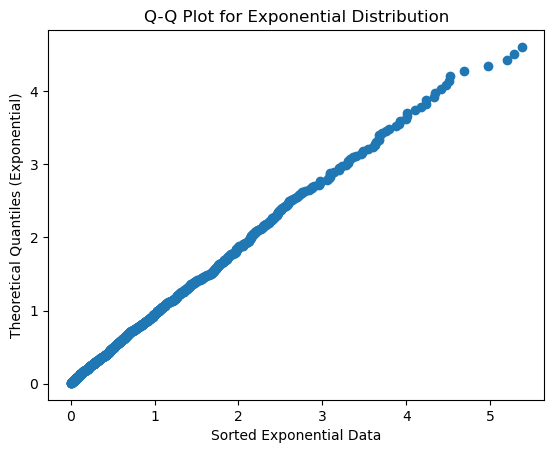

0.00028236657555894603, -0.0004998750416509929
0.003130643508572438, 0.0005001250416822429
0.0033688310706923557, 0.0015011261262670914
0.007060067610417834, 0.002503130218118477
0.009540221538810114, 0.00350613932928759
0.009995943288093466, 0.004510155477886019
0.01009050596339512, 0.005515180688110111
0.012805512399403245, 0.006521216990265463
0.013199798693366236, 0.0075282664207915245
0.01345047493079637, 0.008536331022286335
0.013576496170123846, 0.009545412843531385
0.013885210423227032, 0.010555513939516587
0.014097845452222731, 0.011566636371465405
0.014453496248295776, 0.012578782206860073
0.01527487013486003, 0.013591953519466972
0.015720745206056336, 0.014606152389362114
0.017778488002238524, 0.01562138090295678
0.020169467782737427, 0.01663764115302325
0.024444261982838784, 0.01765493523872071
0.025938710790531453, 0.018673265265621256
0.02736034921627698, 0.019692633345736045
0.028623694388615627, 0.02071304159754157
0.030547461054607088, 0.021734492146006094
0.0305521477

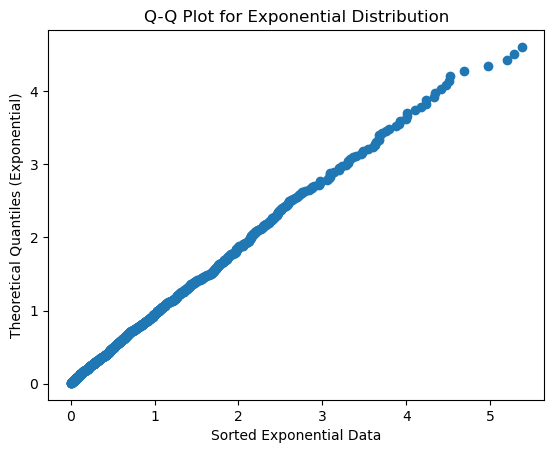

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Set constants
SEED = 42
MEAN = 1.0
SAMPLES = 1000
CLASS_INTERVALS = 30
MULTIPLE = 5.0  # For intervals

# Define exponential and inverse_exponential functions
def exponential(rand, mean):
    return -mean * math.log(rand)

def inverse_exponential(rand, mean):
    return -math.log(1.0 - rand) / mean

# Define float_sort function for sorting floats
def float_sort(a, b):
    if a < b:
        return -1
    elif a == b:
        return 0
    else:
        return 1

# Seed the random number generator
np.random.seed(SEED)

# Generate exponential random variates
values = np.array([(exponential(np.random.rand(), MEAN), 0.0) for _ in range(SAMPLES)])

# Sort values based on the exponential data
values = values[values[:, 0].argsort()]

# Calculate inverse exponential values
for index, value in enumerate(values):
    numi = (index - 0.5) / SAMPLES
    values[index] = (value[0], inverse_exponential(numi, MEAN))

# Print exponential and inverse exponential values
for expo, inv_expo in values:
     print(f"{expo}, {inv_expo}")

# Calculate and print mean and variance
mean = np.mean(values[:, 0])
variance = np.var(values[:, 0], ddof=1)
print("\n\n")
print(f"Mean: {mean}")
print(f"Variance: {variance}")

# Calculate histogram
intervals, bin_edges = np.histogram(values[:, 0], bins=CLASS_INTERVALS, density=False)

# Calculate expected quantiles for Q-Q plot
expected_quantiles = expon.ppf(np.linspace(0.01, 0.99, SAMPLES), scale=MEAN)

# Sort exponential data for Q-Q plot
sorted_values = np.sort(values[:, 0])

# Plot Q-Q plot
plt.scatter(sorted_values, expected_quantiles, marker='o')
plt.xlabel('Sorted Exponential Data')
plt.ylabel('Theoretical Quantiles (Exponential)')
plt.title('Q-Q Plot for Exponential Distribution')
plt.show()


In [20]:
import simpy
import numpy as np

def mm1_queue_simulation(env, arrival_rate, service_rate, simulation_time):
    server = simpy.Resource(env, capacity=1)
    total_customers = 0
    total_waiting_time = 0

    def customer():
        nonlocal total_customers, total_waiting_time
        arrival_time = env.now
        with server.request() as req:
            yield req
            service_time = np.random.exponential(1 / service_rate)
            yield env.timeout(service_time)
        total_customers += 1
        total_waiting_time += env.now - arrival_time

    env.process(customer())

    env.run(until=simulation_time)

    return total_customers, total_waiting_time

def calculate_theoretical_values(arrival_rate, service_rate):
    rho = arrival_rate / service_rate
    theoretical_avg_queue_length = rho**2 / (1 - rho)
    theoretical_avg_waiting_time = rho / (service_rate - arrival_rate)
    return theoretical_avg_queue_length, theoretical_avg_waiting_time

def run_simulations():
    service_rate = 1.0  # Mean service time
    simulation_time = 10000

    for rho in np.arange(0.1, 0.81, 0.1):
        arrival_rate = rho * service_rate
        total_customers, total_waiting_time = mm1_queue_simulation(
            simpy.Environment(), arrival_rate, service_rate, simulation_time
        )

        theoretical_avg_queue_length, theoretical_avg_waiting_time = calculate_theoretical_values(
            arrival_rate, service_rate
        )

        print(f"Rho: {rho:.1f}")
        print(f"Simulated Average Queue Length: {total_waiting_time / simulation_time:.4f}")
        print(f"Theoretical Average Queue Length: {theoretical_avg_queue_length:.4f}")
        print(f"Simulated Average Waiting Time: {total_waiting_time / total_customers:.4f}")
        print(f"Theoretical Average Waiting Time: {theoretical_avg_waiting_time:.4f}")
        print("----------------------------")

if __name__ == "__main__":
    run_simulations()


Rho: 0.1
Simulated Average Queue Length: 0.0000
Theoretical Average Queue Length: 0.0111
Simulated Average Waiting Time: 0.2047
Theoretical Average Waiting Time: 0.1111
----------------------------
Rho: 0.2
Simulated Average Queue Length: 0.0001
Theoretical Average Queue Length: 0.0500
Simulated Average Waiting Time: 0.7807
Theoretical Average Waiting Time: 0.2500
----------------------------
Rho: 0.3
Simulated Average Queue Length: 0.0002
Theoretical Average Queue Length: 0.1286
Simulated Average Waiting Time: 2.0631
Theoretical Average Waiting Time: 0.4286
----------------------------
Rho: 0.4
Simulated Average Queue Length: 0.0001
Theoretical Average Queue Length: 0.2667
Simulated Average Waiting Time: 1.3176
Theoretical Average Waiting Time: 0.6667
----------------------------
Rho: 0.5
Simulated Average Queue Length: 0.0002
Theoretical Average Queue Length: 0.5000
Simulated Average Waiting Time: 1.6428
Theoretical Average Waiting Time: 1.0000
----------------------------
Rho: 0.6
S

In [30]:
import simpy
import numpy as np

def mm1_queue_simulation(env, arrival_rate, service_rate, num_customers, seed=None):
    np.random.seed(seed)  # Set seed for reproducibility
    server = simpy.Resource(env, capacity=1)
    total_customers = 0
    total_waiting_time = 0

    def customer():
        nonlocal total_customers, total_waiting_time
        arrival_time = env.now
        inter_arrival_time = np.random.exponential(1 / arrival_rate)
        yield env.timeout(inter_arrival_time)

        with server.request() as req:
            yield req
            service_time = np.random.exponential(1 / service_rate)
            yield env.timeout(service_time)

        total_customers += 1
        total_waiting_time += env.now - arrival_time

        print(f"Customer {total_customers}:")
        print(f"  Arrival Time: {arrival_time:.4f}")
        print(f"  Inter-Arrival Time: {inter_arrival_time:.4f}")
        print(f"  Service Time: {service_time:.4f}")
        print(f"  Waiting Time: {env.now - arrival_time:.4f}")
        print("------------------------")

    for _ in range(num_customers):
        env.process(customer())

    env.run()

    return total_customers, total_waiting_time

def calculate_theoretical_values(arrival_rate, service_rate):
    rho = arrival_rate / service_rate
    theoretical_avg_queue_length = (rho**2) / (1 - rho)
    theoretical_avg_waiting_time = rho / (service_rate - arrival_rate)
    return theoretical_avg_queue_length, theoretical_avg_waiting_time

def run_simulations():
    service_rate = 1.0  # Mean service time
    num_customers_per_simulation = 15

    for rho in np.arange(0.1, 0.81, 0.1):
        arrival_rate = rho * service_rate
        print(f"Rho: {rho:.1f}")

        total_customers, total_waiting_time = mm1_queue_simulation(
            simpy.Environment(), arrival_rate, service_rate, num_customers_per_simulation, seed=123
        )

        theoretical_avg_queue_length, theoretical_avg_waiting_time = calculate_theoretical_values(
            arrival_rate, service_rate
        )

        print(f"Simulated Average Queue Length: {total_waiting_time / num_customers_per_simulation:.4f}")
        print(f"Theoretical Average Queue Length: {theoretical_avg_queue_length:.4f}")
        print(f"Simulated Average Waiting Time: {total_waiting_time / total_customers:.4f}")
        print(f"Theoretical Average Waiting Time: {theoretical_avg_waiting_time:.4f}")
        print("----------------------------")

if __name__ == "__main__":
    run_simulations()


Rho: 0.1
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.6153
  Service Time: 1.3394
  Waiting Time: 1.9547
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 2.5728
  Service Time: 0.2015
  Waiting Time: 2.7743
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 3.3707
  Service Time: 0.1929
  Waiting Time: 3.5636
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 4.2034
  Service Time: 0.7583
  Waiting Time: 4.9618
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 4.9777
  Service Time: 0.7589
  Waiting Time: 5.7367
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 5.0757
  Service Time: 1.0062
  Waiting Time: 6.7429
------------------------
Customer 7:
  Arrival Time: 0.0000
  Inter-Arrival Time: 5.5010
  Service Time: 1.8933
  Waiting Time: 8.6362
------------------------
Customer 8:
  Arrival Time: 0.0000
  Inter-Arr

In [33]:
import simpy
import numpy as np

def mm1_queue_simulation(env, arrival_rate, service_rate, num_customers):
    server = simpy.Resource(env, capacity=1)
    total_customers = 0
    total_waiting_time = 0

    def customer():
        nonlocal total_customers, total_waiting_time
        arrival_time = env.now
        inter_arrival_time = np.random.exponential(1 / arrival_rate)
        yield env.timeout(inter_arrival_time)

        with server.request() as req:
            yield req
            service_time = np.random.exponential(1 / service_rate)
            yield env.timeout(service_time)

        total_customers += 1
        total_waiting_time += env.now - arrival_time

        print(f"Customer {total_customers}:")
        print(f"  Arrival Time: {arrival_time:.4f}")
        print(f"  Inter-Arrival Time: {inter_arrival_time:.4f}")
        print(f"  Service Time: {service_time:.4f}")
        print(f"  Waiting Time: {env.now - arrival_time:.4f}")
        print("------------------------")

    for _ in range(num_customers):
        env.process(customer())

    env.run()

    return total_customers, total_waiting_time

def calculate_theoretical_values(arrival_rate, service_rate):
    rho = arrival_rate / service_rate
    theoretical_avg_queue_length = (rho**2) / (1 - rho)
    theoretical_avg_waiting_time = rho / (service_rate - arrival_rate)
    return theoretical_avg_queue_length, theoretical_avg_waiting_time

def run_simulations():
    service_rate = 1.0  # Mean service time
    num_customers_per_simulation = 15

    for rho in np.arange(0.1, 0.81, 0.1):
        arrival_rate = rho * service_rate
        print(f"Rho: {rho:.1f}")

        total_customers, total_waiting_time = mm1_queue_simulation(
            simpy.Environment(), arrival_rate, service_rate, num_customers_per_simulation
        )

        theoretical_avg_queue_length, theoretical_avg_waiting_time = calculate_theoretical_values(
            arrival_rate, service_rate
        )

        print(f"Simulated Average Queue Length: {total_waiting_time / num_customers_per_simulation:.4f}")
        print(f"Theoretical Average Queue Length: {theoretical_avg_queue_length:.4f}")
        print(f"Simulated Average Waiting Time: {total_waiting_time / total_customers:.4f}")
        print(f"Theoretical Average Waiting Time: {theoretical_avg_waiting_time:.4f}")
        print("----------------------------")

if __name__ == "__main__":
    run_simulations()


Rho: 0.1
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.0408
  Service Time: 0.3896
  Waiting Time: 1.4304
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 2.4924
  Service Time: 0.1598
  Waiting Time: 2.6522
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 3.6152
  Service Time: 0.3344
  Waiting Time: 3.9495
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 4.1523
  Service Time: 1.5107
  Waiting Time: 5.6630
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 5.0677
  Service Time: 0.7400
  Waiting Time: 6.4030
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 5.1876
  Service Time: 0.0345
  Waiting Time: 6.4375
------------------------
Customer 7:
  Arrival Time: 0.0000
  Inter-Arrival Time: 5.8219
  Service Time: 4.0526
  Waiting Time: 10.4901
------------------------
Customer 8:
  Arrival Time: 0.0000
  Inter-Ar

Rho: 0.1
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.4836
  Service Time: 0.4667
  Waiting Time: 0.4836
  Customers in Queue: 0
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.1654
  Service Time: 2.0031
  Waiting Time: 1.1654
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 2.3690
  Service Time: 0.5896
  Waiting Time: 3.1685
  Customers in Queue: 0
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 3.9107
  Service Time: 0.8315
  Waiting Time: 3.9107
  Customers in Queue: 3
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 4.2375
  Service Time: 0.4933
  Waiting Time: 4.7422
  Customers in Queue: 4
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 4.5908
  Service Time: 0.9503
  Waiting Time: 5.2355
  Customers in Queue: 3
------------------------
Customer 7:
  Arrival Time: 0.0000
  

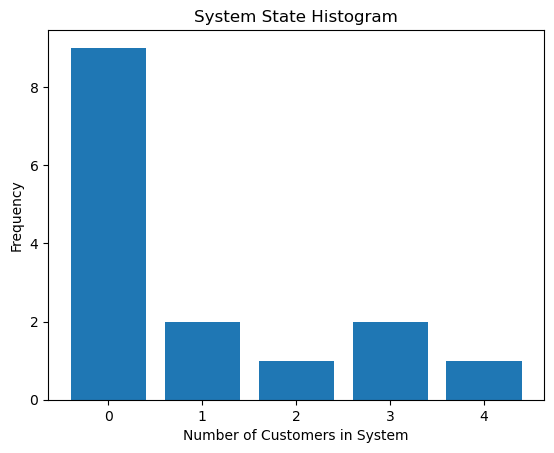

----------------------------
Rho: 0.2
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.4534
  Service Time: 1.4406
  Waiting Time: 0.4534
  Customers in Queue: 3
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.9332
  Service Time: 0.3287
  Waiting Time: 1.8941
  Customers in Queue: 3
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.4168
  Service Time: 0.5160
  Waiting Time: 2.2228
  Customers in Queue: 2
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.8830
  Service Time: 0.0362
  Waiting Time: 2.7388
  Customers in Queue: 2
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 2.2166
  Service Time: 0.1562
  Waiting Time: 2.7750
  Customers in Queue: 2
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 2.7539
  Service Time: 0.1193
  Waiting Time: 2.9312
  Customers in Queue: 1
------------------------
Customer

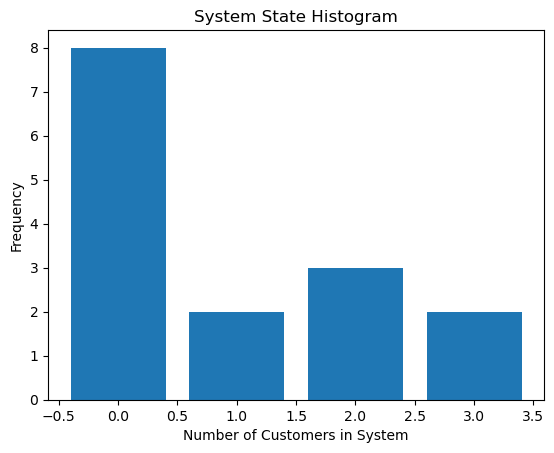

----------------------------
Rho: 0.3
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.1079
  Service Time: 0.4687
  Waiting Time: 0.1079
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.1620
  Service Time: 0.5502
  Waiting Time: 0.5766
  Customers in Queue: 0
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.1489
  Service Time: 1.3331
  Waiting Time: 1.1489
  Customers in Queue: 5
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.1877
  Service Time: 1.3261
  Waiting Time: 2.4820
  Customers in Queue: 6
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 2.2300
  Service Time: 0.4807
  Waiting Time: 3.8081
  Customers in Queue: 5
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 2.3433
  Service Time: 0.5170
  Waiting Time: 4.2888
  Customers in Queue: 6
------------------------
Customer

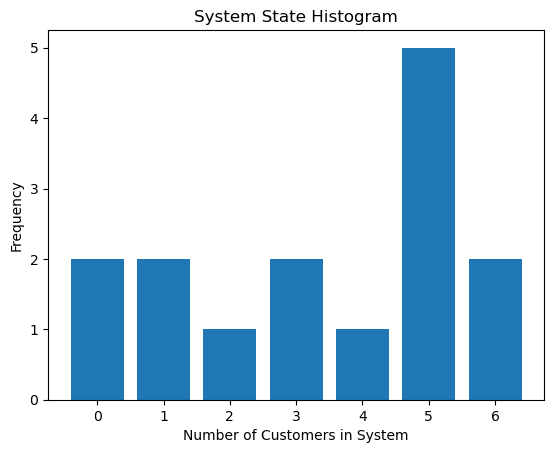

----------------------------
Rho: 0.4
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.0061
  Service Time: 4.4740
  Waiting Time: 0.0061
  Customers in Queue: 11
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.1340
  Service Time: 0.1552
  Waiting Time: 4.4802
  Customers in Queue: 10
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.3478
  Service Time: 0.1068
  Waiting Time: 4.6354
  Customers in Queue: 9
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.5955
  Service Time: 0.4033
  Waiting Time: 4.7421
  Customers in Queue: 9
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.7666
  Service Time: 0.1462
  Waiting Time: 5.1454
  Customers in Queue: 8
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.2198
  Service Time: 1.1325
  Waiting Time: 5.2917
  Customers in Queue: 8
------------------------
Custom

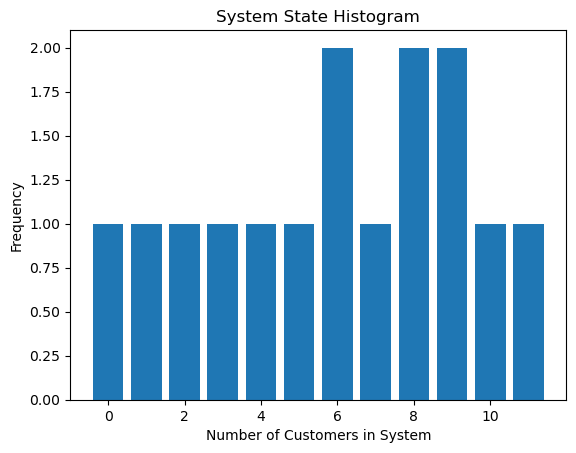

----------------------------
Rho: 0.5
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.4099
  Service Time: 0.3005
  Waiting Time: 0.4099
  Customers in Queue: 0
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.0028
  Service Time: 0.0675
  Waiting Time: 1.0028
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.0201
  Service Time: 0.7313
  Waiting Time: 1.0703
  Customers in Queue: 5
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.2389
  Service Time: 0.5593
  Waiting Time: 1.8016
  Customers in Queue: 4
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.4087
  Service Time: 0.7491
  Waiting Time: 2.3608
  Customers in Queue: 6
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.5583
  Service Time: 0.9491
  Waiting Time: 3.1099
  Customers in Queue: 5
------------------------
Customer

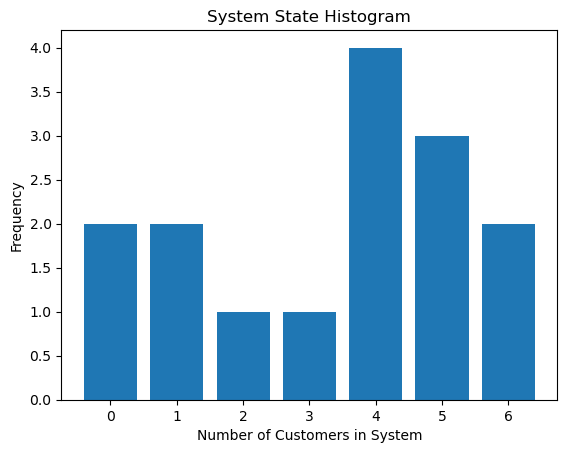

----------------------------
Rho: 0.6
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.0208
  Service Time: 0.6087
  Waiting Time: 0.0208
  Customers in Queue: 4
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.0410
  Service Time: 1.6477
  Waiting Time: 0.6295
  Customers in Queue: 9
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.3949
  Service Time: 0.3094
  Waiting Time: 2.2773
  Customers in Queue: 9
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.4407
  Service Time: 0.5220
  Waiting Time: 2.5867
  Customers in Queue: 8
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.5701
  Service Time: 1.1726
  Waiting Time: 3.1087
  Customers in Queue: 9
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.1881
  Service Time: 0.5976
  Waiting Time: 4.2813
  Customers in Queue: 8
------------------------
Customer

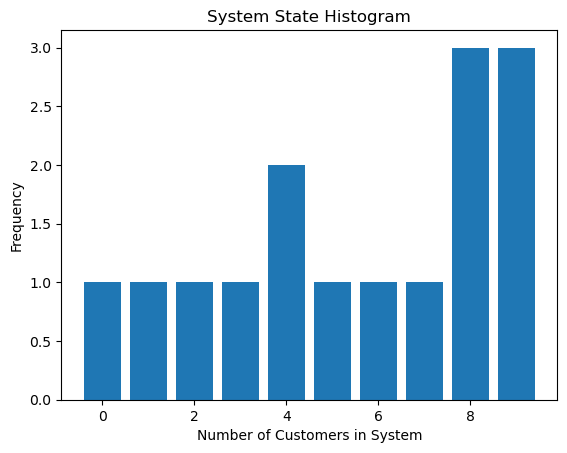

----------------------------
Rho: 0.7
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.1034
  Service Time: 2.4892
  Waiting Time: 0.1034
  Customers in Queue: 10
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.2603
  Service Time: 0.4023
  Waiting Time: 2.5926
  Customers in Queue: 9
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.5415
  Service Time: 2.1726
  Waiting Time: 2.9949
  Customers in Queue: 10
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.7157
  Service Time: 0.2734
  Waiting Time: 5.1675
  Customers in Queue: 9
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.9836
  Service Time: 0.8723
  Waiting Time: 5.4409
  Customers in Queue: 9
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 1.0623
  Service Time: 0.7650
  Waiting Time: 6.3131
  Customers in Queue: 9
------------------------
Custom

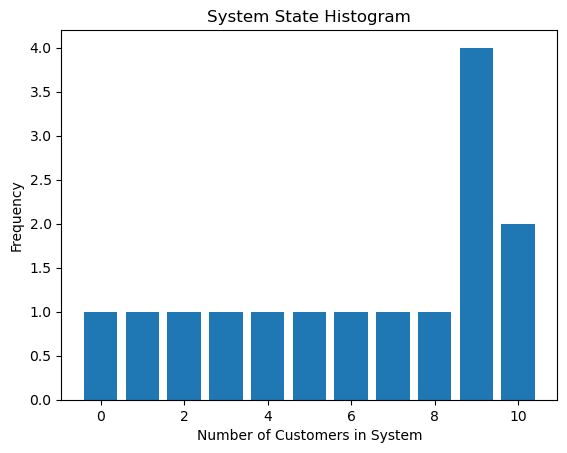

----------------------------
Rho: 0.8
Customer 1:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.0828
  Service Time: 0.0643
  Waiting Time: 0.0828
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.0927
  Service Time: 1.0398
  Waiting Time: 0.1470
  Customers in Queue: 7
------------------------
Customer 3:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.1567
  Service Time: 1.2823
  Waiting Time: 1.1869
  Customers in Queue: 11
------------------------
Customer 4:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.5208
  Service Time: 0.1539
  Waiting Time: 2.4692
  Customers in Queue: 11
------------------------
Customer 5:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.8627
  Service Time: 2.1494
  Waiting Time: 2.6231
  Customers in Queue: 10
------------------------
Customer 6:
  Arrival Time: 0.0000
  Inter-Arrival Time: 0.9248
  Service Time: 1.9412
  Waiting Time: 4.7725
  Customers in Queue: 9
------------------------
Custo

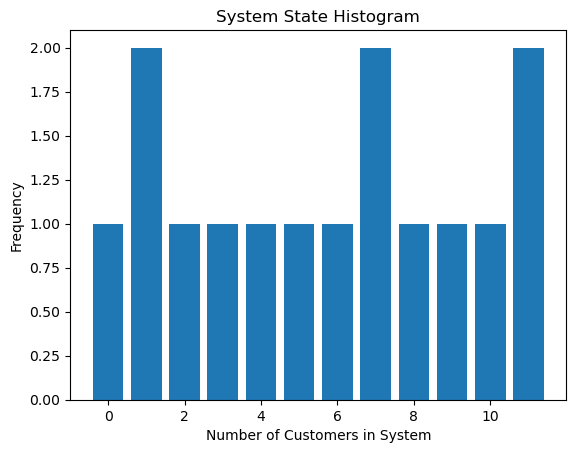

----------------------------


In [51]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

def mm1_queue_simulation(env, arrival_rate, service_rate, num_customers):
    server = simpy.Resource(env, capacity=1)
    total_customers = 0
    total_waiting_time = 0
    total_time_in_system = 0
    waiting_line = []
    system_state_histogram = []

    def customer():
        nonlocal total_customers, total_waiting_time, total_time_in_system
        arrival_time = env.now
        inter_arrival_time = np.random.exponential(1 / arrival_rate)
        yield env.timeout(inter_arrival_time)

        with server.request() as req:
            yield req
            service_time = np.random.exponential(1 / service_rate)
            yield env.timeout(service_time)

        total_customers += 1
        total_waiting_time += max(0, env.now - arrival_time - service_time)
        total_time_in_system += env.now - arrival_time
        waiting_line.append(len(server.queue))

        system_state_histogram.append(len(server.queue))

        print(f"Customer {total_customers}:")
        print(f"  Arrival Time: {arrival_time:.4f}")
        print(f"  Inter-Arrival Time: {inter_arrival_time:.4f}")
        print(f"  Service Time: {service_time:.4f}")
        print(f"  Waiting Time: {max(0, env.now - arrival_time - service_time):.4f}")
        print(f"  Customers in Queue: {len(server.queue)}")
        print("------------------------")

    for _ in range(num_customers):
        env.process(customer())

    env.run()

    avg_queue_length = total_waiting_time / num_customers
    avg_waiting_time = total_waiting_time / total_customers
    avg_time_in_system = total_time_in_system / total_customers
    avg_time_in_queue = total_waiting_time / total_customers

    return avg_queue_length, avg_waiting_time, avg_time_in_system, avg_time_in_queue, system_state_histogram

def calculate_theoretical_values(arrival_rate, service_rate):
    rho = arrival_rate / service_rate
    theoretical_avg_queue_length = (rho**2) / (1 - rho)
    theoretical_avg_waiting_time = rho / (service_rate - arrival_rate)
    return theoretical_avg_queue_length, theoretical_avg_waiting_time

def run_simulations():
    service_rate = 1.0  # Mean service time
    num_customers_per_simulation = 15

    for rho in np.arange(0.1, 0.81, 0.1):
        arrival_rate = rho * service_rate
        print(f"Rho: {rho:.1f}")

        avg_queue_length, avg_waiting_time, avg_time_in_system, avg_time_in_queue, system_state_histogram = mm1_queue_simulation(
            simpy.Environment(), arrival_rate, service_rate, num_customers_per_simulation
        )

        theoretical_avg_queue_length, theoretical_avg_waiting_time = calculate_theoretical_values(
            arrival_rate, service_rate
        )

        print(f"Simulated Average Queue Length: {avg_queue_length:.4f}")
        print(f"Theoretical Average Queue Length: {theoretical_avg_queue_length:.4f}")
        print(f"Simulated Average Waiting Time: {avg_waiting_time:.4f}")
        print(f"Theoretical Average Waiting Time: {theoretical_avg_waiting_time:.4f}")
        print(f"Simulated Average Time in System: {avg_time_in_system:.4f}")
        print(f"Simulated Average Time in Queue: {avg_time_in_queue:.4f}")

        # Plotting the system state histogram
        plt.hist(system_state_histogram, bins=range(max(system_state_histogram) + 2), align="left", rwidth=0.8)
        plt.title("System State Histogram")
        plt.xlabel("Number of Customers in System")
        plt.ylabel("Frequency")
        plt.show()

        print("----------------------------")

if __name__ == "__main__":
    run_simulations()


Rho: 0.1
Customer 1:
  Arrival Time: 1.8884
  Inter-Arrival Time: 0.4973
  Service Time: 1.4507
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 9.5067
  Inter-Arrival Time: 1.3911
  Service Time: 1.6949
  Waiting Time: 0.0000
  Customers in Queue: 3
------------------------
Customer 3:
  Arrival Time: 13.3597
  Inter-Arrival Time: 2.1228
  Service Time: 0.7126
  Waiting Time: 0.0000
  Customers in Queue: 3
------------------------
Customer 4:
  Arrival Time: 13.3597
  Inter-Arrival Time: 2.4783
  Service Time: 0.3885
  Waiting Time: 0.0000
  Customers in Queue: 2
------------------------
Customer 5:
  Arrival Time: 13.3597
  Inter-Arrival Time: 3.0173
  Service Time: 0.2420
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 26.9843
  Inter-Arrival Time: 3.8530
  Service Time: 3.1992
  Waiting Time: 0.0000
  Customers in Queue: 2
------------------------
Customer 7:
  Arrival Time: 35.45

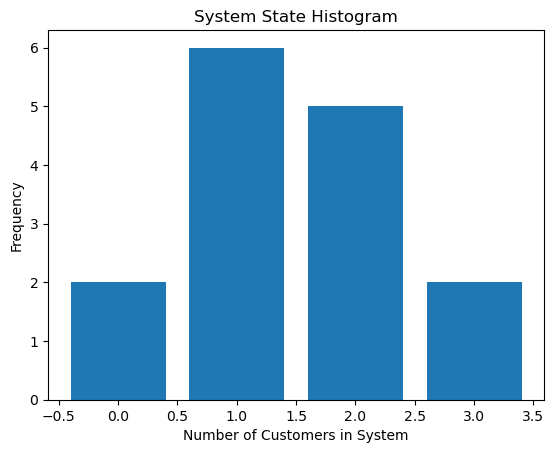

----------------------------
Rho: 0.2
Customer 1:
  Arrival Time: 3.1728
  Inter-Arrival Time: 0.0086
  Service Time: 1.7467
  Waiting Time: 0.0000
  Customers in Queue: 3
------------------------
Customer 2:
  Arrival Time: 10.0497
  Inter-Arrival Time: 0.4249
  Service Time: 0.6824
  Waiting Time: 0.0000
  Customers in Queue: 5
------------------------
Customer 3:
  Arrival Time: 12.6768
  Inter-Arrival Time: 1.2315
  Service Time: 0.2726
  Waiting Time: 0.0000
  Customers in Queue: 5
------------------------
Customer 4:
  Arrival Time: 15.4339
  Inter-Arrival Time: 1.5078
  Service Time: 0.1058
  Waiting Time: 0.0000
  Customers in Queue: 5
------------------------
Customer 5:
  Arrival Time: 25.0179
  Inter-Arrival Time: 2.2542
  Service Time: 0.8623
  Waiting Time: 0.0000
  Customers in Queue: 7
------------------------
Customer 6:
  Arrival Time: 25.0179
  Inter-Arrival Time: 2.2797
  Service Time: 0.6512
  Waiting Time: 0.0000
  Customers in Queue: 6
------------------------
Cus

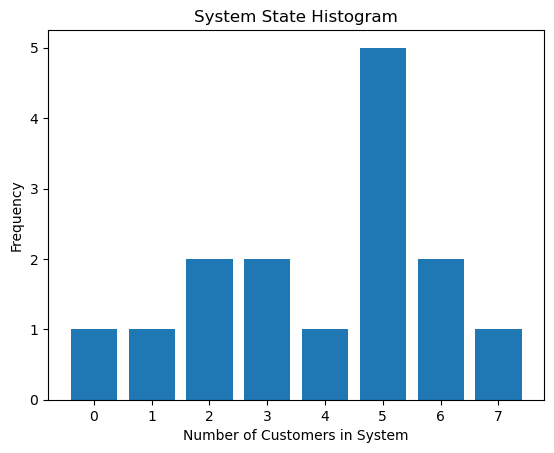

----------------------------
Rho: 0.3
Customer 1:
  Arrival Time: 1.4820
  Inter-Arrival Time: 0.0551
  Service Time: 0.8171
  Waiting Time: 0.0000
  Customers in Queue: 2
------------------------
Customer 2:
  Arrival Time: 1.4820
  Inter-Arrival Time: 0.5899
  Service Time: 0.0278
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 2.5749
  Inter-Arrival Time: 0.8370
  Service Time: 0.3825
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 4:
  Arrival Time: 2.5749
  Inter-Arrival Time: 1.0929
  Service Time: 0.0419
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 5:
  Arrival Time: 15.1656
  Inter-Arrival Time: 1.4109
  Service Time: 1.1602
  Waiting Time: 0.0000
  Customers in Queue: 5
------------------------
Customer 6:
  Arrival Time: 24.1538
  Inter-Arrival Time: 2.0151
  Service Time: 0.7204
  Waiting Time: 0.0000
  Customers in Queue: 7
------------------------
Custom

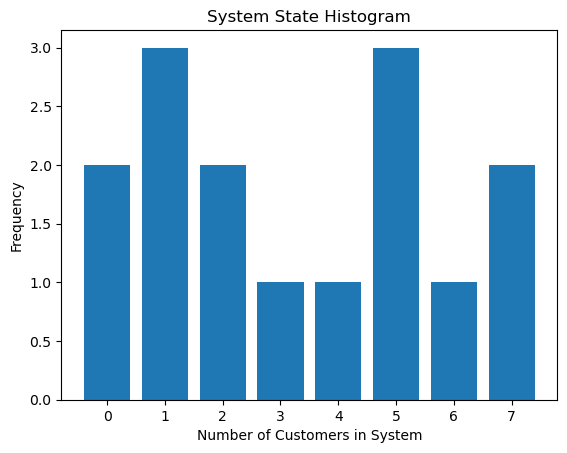

----------------------------
Rho: 0.4
Customer 1:
  Arrival Time: 0.5439
  Inter-Arrival Time: 0.0617
  Service Time: 0.6177
  Waiting Time: 0.0000
  Customers in Queue: 2
------------------------
Customer 2:
  Arrival Time: 4.1246
  Inter-Arrival Time: 0.1668
  Service Time: 1.0278
  Waiting Time: 0.0000
  Customers in Queue: 4
------------------------
Customer 3:
  Arrival Time: 14.2351
  Inter-Arrival Time: 0.3153
  Service Time: 1.5215
  Waiting Time: 0.0000
  Customers in Queue: 7
------------------------
Customer 4:
  Arrival Time: 14.2351
  Inter-Arrival Time: 0.9895
  Service Time: 1.0151
  Waiting Time: 0.0000
  Customers in Queue: 6
------------------------
Customer 5:
  Arrival Time: 18.5877
  Inter-Arrival Time: 0.9960
  Service Time: 0.1710
  Waiting Time: 0.0000
  Customers in Queue: 6
------------------------
Customer 6:
  Arrival Time: 23.3151
  Inter-Arrival Time: 1.5953
  Service Time: 0.7546
  Waiting Time: 0.0000
  Customers in Queue: 6
------------------------
Cust

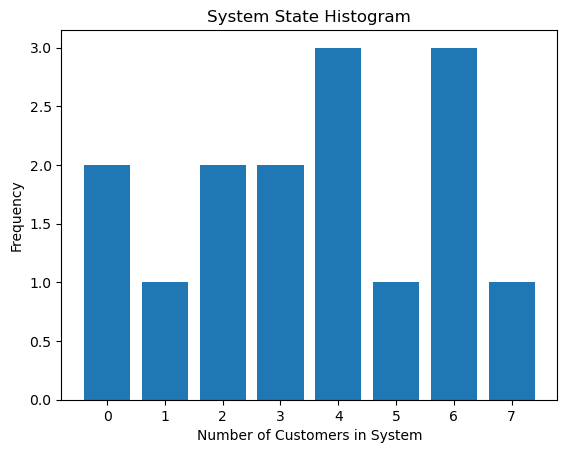

----------------------------
Rho: 0.5
Customer 1:
  Arrival Time: 5.4609
  Inter-Arrival Time: 0.2705
  Service Time: 1.3439
  Waiting Time: 0.0000
  Customers in Queue: 6
------------------------
Customer 2:
  Arrival Time: 14.5453
  Inter-Arrival Time: 0.5600
  Service Time: 1.3453
  Waiting Time: 0.0000
  Customers in Queue: 9
------------------------
Customer 3:
  Arrival Time: 24.7641
  Inter-Arrival Time: 0.5881
  Service Time: 1.7365
  Waiting Time: 0.0000
  Customers in Queue: 11
------------------------
Customer 4:
  Arrival Time: 29.5078
  Inter-Arrival Time: 0.6162
  Service Time: 1.8956
  Waiting Time: 0.0000
  Customers in Queue: 11
------------------------
Customer 5:
  Arrival Time: 29.5078
  Inter-Arrival Time: 0.7363
  Service Time: 0.7913
  Waiting Time: 0.0000
  Customers in Queue: 10
------------------------
Customer 6:
  Arrival Time: 29.5078
  Inter-Arrival Time: 1.3101
  Service Time: 0.2984
  Waiting Time: 0.0000
  Customers in Queue: 9
------------------------


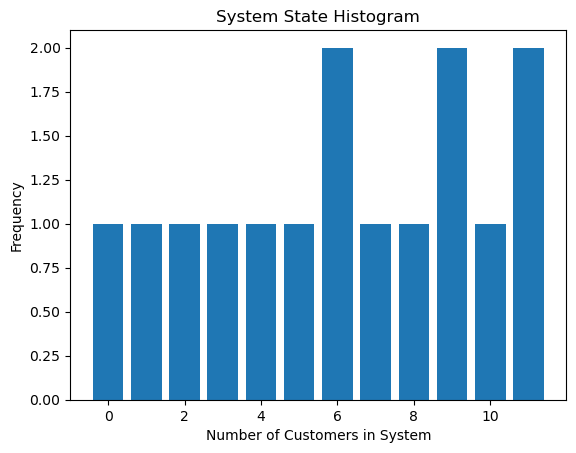

----------------------------
Rho: 0.6
Customer 1:
  Arrival Time: 5.0897
  Inter-Arrival Time: 0.1609
  Service Time: 1.1805
  Waiting Time: 0.0000
  Customers in Queue: 8
------------------------
Customer 2:
  Arrival Time: 5.0897
  Inter-Arrival Time: 0.2484
  Service Time: 0.3903
  Waiting Time: 0.0000
  Customers in Queue: 7
------------------------
Customer 3:
  Arrival Time: 19.4187
  Inter-Arrival Time: 0.4890
  Service Time: 1.8586
  Waiting Time: 0.0000
  Customers in Queue: 12
------------------------
Customer 4:
  Arrival Time: 19.4187
  Inter-Arrival Time: 0.5899
  Service Time: 0.9633
  Waiting Time: 0.0000
  Customers in Queue: 11
------------------------
Customer 5:
  Arrival Time: 19.4187
  Inter-Arrival Time: 0.6181
  Service Time: 0.0077
  Waiting Time: 0.0000
  Customers in Queue: 10
------------------------
Customer 6:
  Arrival Time: 19.4187
  Inter-Arrival Time: 0.7033
  Service Time: 0.1418
  Waiting Time: 0.0000
  Customers in Queue: 9
------------------------
C

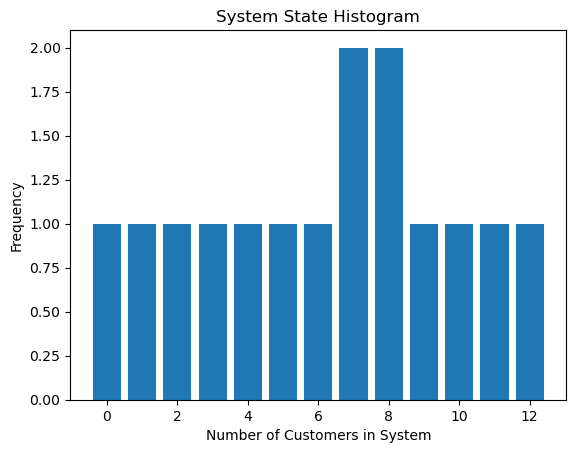

----------------------------
Rho: 0.7
Customer 1:
  Arrival Time: 0.0364
  Inter-Arrival Time: 0.0364
  Service Time: 0.0361
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 2:
  Arrival Time: 0.4520
  Inter-Arrival Time: 0.1469
  Service Time: 0.2441
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 6.3644
  Inter-Arrival Time: 0.2687
  Service Time: 0.7163
  Waiting Time: 0.0000
  Customers in Queue: 8
------------------------
Customer 4:
  Arrival Time: 11.2987
  Inter-Arrival Time: 0.5139
  Service Time: 0.9604
  Waiting Time: 0.0000
  Customers in Queue: 10
------------------------
Customer 5:
  Arrival Time: 13.3763
  Inter-Arrival Time: 0.5613
  Service Time: 0.2047
  Waiting Time: 0.0000
  Customers in Queue: 10
------------------------
Customer 6:
  Arrival Time: 13.3763
  Inter-Arrival Time: 0.6386
  Service Time: 0.2170
  Waiting Time: 0.0000
  Customers in Queue: 9
------------------------
Cus

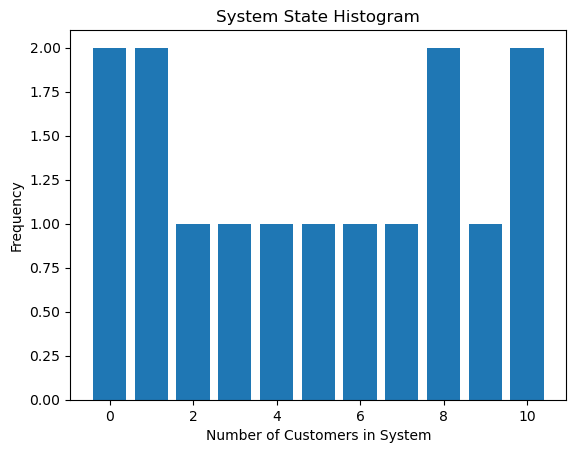

----------------------------
Rho: 0.8
Customer 1:
  Arrival Time: 1.2831
  Inter-Arrival Time: 0.0300
  Service Time: 0.3948
  Waiting Time: 0.0000
  Customers in Queue: 5
------------------------
Customer 2:
  Arrival Time: 1.7606
  Inter-Arrival Time: 0.0553
  Service Time: 0.4968
  Waiting Time: 0.0000
  Customers in Queue: 5
------------------------
Customer 3:
  Arrival Time: 8.4154
  Inter-Arrival Time: 0.1373
  Service Time: 1.4609
  Waiting Time: 0.0000
  Customers in Queue: 10
------------------------
Customer 4:
  Arrival Time: 8.4154
  Inter-Arrival Time: 0.3292
  Service Time: 0.3070
  Waiting Time: 0.0000
  Customers in Queue: 9
------------------------
Customer 5:
  Arrival Time: 15.2036
  Inter-Arrival Time: 0.3619
  Service Time: 2.9901
  Waiting Time: 0.0000
  Customers in Queue: 10
------------------------
Customer 6:
  Arrival Time: 15.2036
  Inter-Arrival Time: 0.3693
  Service Time: 0.8495
  Waiting Time: 0.0000
  Customers in Queue: 9
------------------------
Cust

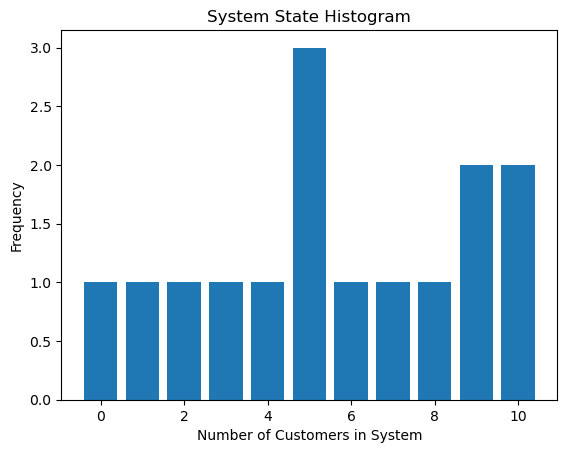

----------------------------


In [52]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

def mm1_queue_simulation(env, arrival_rate, service_rate, num_customers):
    server = simpy.Resource(env, capacity=1)
    total_customers = 0
    total_waiting_time = 0
    total_time_in_system = 0
    waiting_line = []
    system_state_histogram = []
    arrival_time = 0  # Initialize arrival_time to 0

    def customer():
        nonlocal total_customers, total_waiting_time, total_time_in_system, arrival_time
        inter_arrival_time = np.random.exponential(1 / arrival_rate)
        yield env.timeout(inter_arrival_time)

        arrival_time += inter_arrival_time  # Update arrival_time for each customer

        with server.request() as req:
            yield req
            service_time = np.random.exponential(1 / service_rate)
            yield env.timeout(service_time)

        total_customers += 1
        total_waiting_time += max(0, env.now - arrival_time - service_time)
        total_time_in_system += env.now - arrival_time
        waiting_line.append(len(server.queue))

        system_state_histogram.append(len(server.queue))

        print(f"Customer {total_customers}:")
        print(f"  Arrival Time: {arrival_time:.4f}")
        print(f"  Inter-Arrival Time: {inter_arrival_time:.4f}")
        print(f"  Service Time: {service_time:.4f}")
        print(f"  Waiting Time: {max(0, env.now - arrival_time - service_time):.4f}")
        print(f"  Customers in Queue: {len(server.queue)}")
        print("------------------------")

    for _ in range(num_customers):
        env.process(customer())

    env.run()

    avg_queue_length = total_waiting_time / num_customers
    avg_waiting_time = total_waiting_time / total_customers
    avg_time_in_system = total_time_in_system / total_customers
    avg_time_in_queue = total_waiting_time / total_customers

    return avg_queue_length, avg_waiting_time, avg_time_in_system, avg_time_in_queue, system_state_histogram

def calculate_theoretical_values(arrival_rate, service_rate):
    rho = arrival_rate / service_rate
    theoretical_avg_queue_length = (rho**2) / (1 - rho)
    theoretical_avg_waiting_time = rho / (service_rate - arrival_rate)
    return theoretical_avg_queue_length, theoretical_avg_waiting_time

def run_simulations():
    service_rate = 1.0  # Mean service time
    num_customers_per_simulation = 15

    for rho in np.arange(0.1, 0.81, 0.1):
        arrival_rate = rho * service_rate
        print(f"Rho: {rho:.1f}")

        avg_queue_length, avg_waiting_time, avg_time_in_system, avg_time_in_queue, system_state_histogram = mm1_queue_simulation(
            simpy.Environment(), arrival_rate, service_rate, num_customers_per_simulation
        )

        theoretical_avg_queue_length, theoretical_avg_waiting_time = calculate_theoretical_values(
            arrival_rate, service_rate
        )

        print(f"Simulated Average Queue Length: {avg_queue_length:.4f}")
        print(f"Theoretical Average Queue Length: {theoretical_avg_queue_length:.4f}")
        print(f"Simulated Average Waiting Time: {avg_waiting_time:.4f}")
        print(f"Theoretical Average Waiting Time: {theoretical_avg_waiting_time:.4f}")
        print(f"Simulated Average Time in System: {avg_time_in_system:.4f}")
        print(f"Simulated Average Time in Queue: {avg_time_in_queue:.4f}")

        # Plotting the system state histogram
        plt.hist(system_state_histogram, bins=range(max(system_state_histogram) + 2), align="left", rwidth=0.8)
        plt.title("System State Histogram")
        plt.xlabel("Number of Customers in System")
        plt.ylabel("Frequency")
        plt.show()

        print("----------------------------")

if __name__ == "__main__":
    run_simulations()


Rho: 0.1
Customer 1:
  Arrival Time: 1.0151
  Inter-Arrival Time: 1.0151
  Service Time: 2.0762
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 2.2778
  Inter-Arrival Time: 1.2627
  Service Time: 1.0891
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 14.2226
  Inter-Arrival Time: 11.9448
  Service Time: 0.0185
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 4:
  Arrival Time: 14.4741
  Inter-Arrival Time: 0.2515
  Service Time: 1.8934
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 5:
  Arrival Time: 20.4984
  Inter-Arrival Time: 6.0243
  Service Time: 0.5043
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 31.3503
  Inter-Arrival Time: 10.8519
  Service Time: 1.8632
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 37.

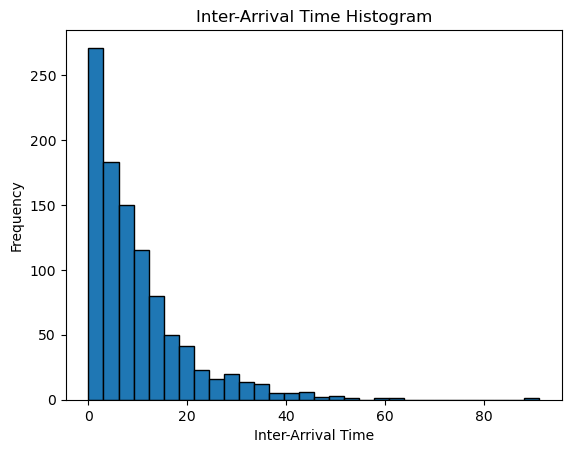

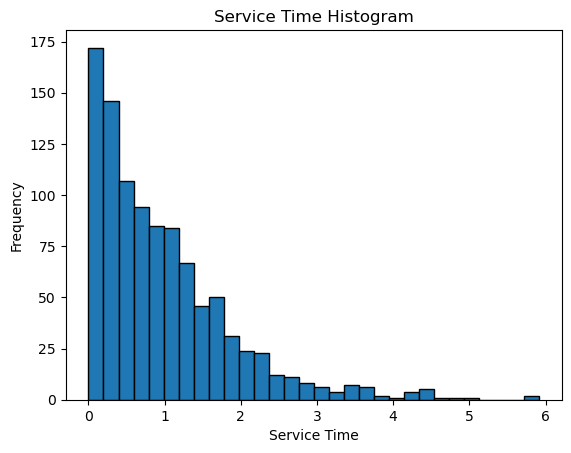

Rho: 0.2
Customer 1:
  Arrival Time: 15.2138
  Inter-Arrival Time: 15.2138
  Service Time: 0.2155
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 19.1869
  Inter-Arrival Time: 3.9731
  Service Time: 3.3877
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 20.3552
  Inter-Arrival Time: 1.1683
  Service Time: 0.3826
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 4:
  Arrival Time: 20.5555
  Inter-Arrival Time: 0.2003
  Service Time: 1.3400
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 5:
  Arrival Time: 26.8842
  Inter-Arrival Time: 6.3286
  Service Time: 0.8080
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 29.5169
  Inter-Arrival Time: 2.6327
  Service Time: 0.8649
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 39

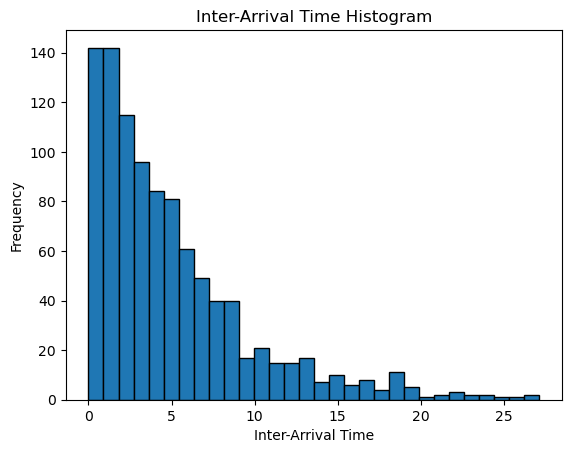

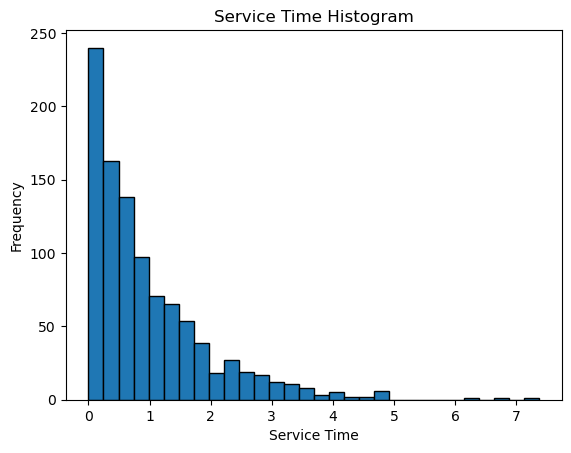

Rho: 0.3
Customer 1:
  Arrival Time: 4.8064
  Inter-Arrival Time: 4.8064
  Service Time: 1.0664
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 12.7552
  Inter-Arrival Time: 7.9488
  Service Time: 0.1493
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 15.2015
  Inter-Arrival Time: 2.4463
  Service Time: 0.8754
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 4:
  Arrival Time: 15.6957
  Inter-Arrival Time: 0.4942
  Service Time: 1.8905
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 5:
  Arrival Time: 17.9311
  Inter-Arrival Time: 2.2354
  Service Time: 1.0088
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 17.9449
  Inter-Arrival Time: 0.0138
  Service Time: 0.7126
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 20.5

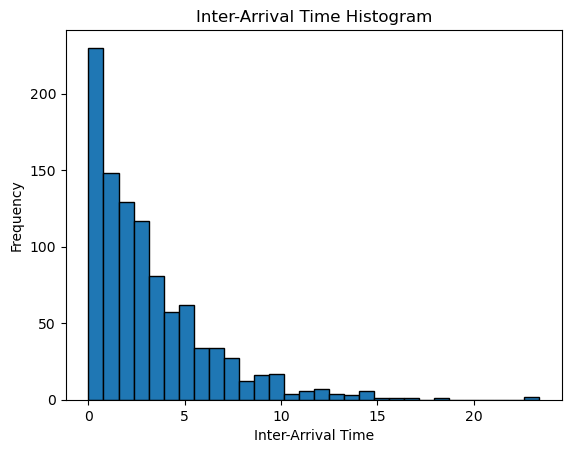

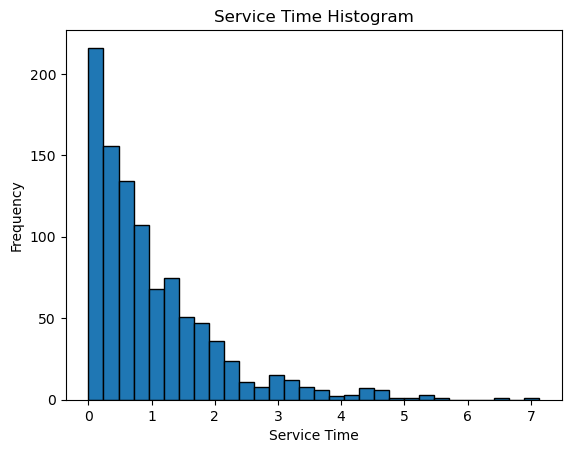

Rho: 0.4
Customer 1:
  Arrival Time: 0.4183
  Inter-Arrival Time: 0.4183
  Service Time: 1.3423
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 1.3640
  Inter-Arrival Time: 0.9457
  Service Time: 0.7851
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 13.2300
  Inter-Arrival Time: 11.8660
  Service Time: 3.1347
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 4:
  Arrival Time: 15.3078
  Inter-Arrival Time: 2.0777
  Service Time: 0.6847
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 5:
  Arrival Time: 17.4188
  Inter-Arrival Time: 2.1110
  Service Time: 0.4150
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 23.9718
  Inter-Arrival Time: 6.5531
  Service Time: 1.3282
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 28.4

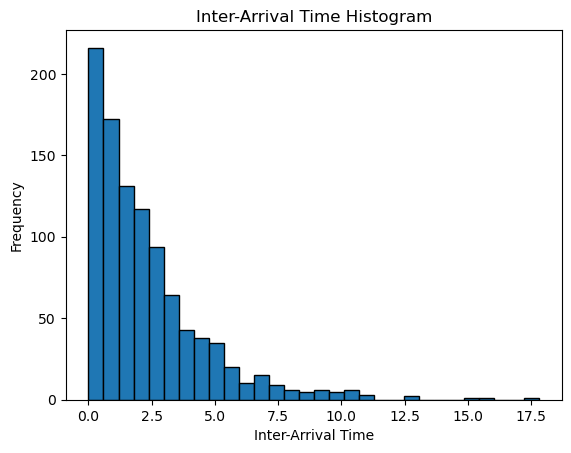

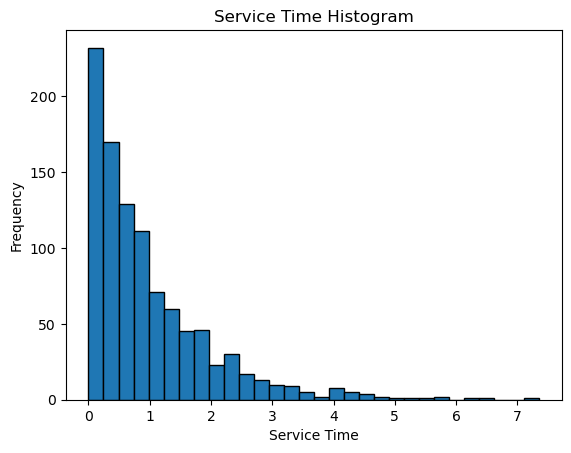

Rho: 0.5
Customer 1:
  Arrival Time: 3.2314
  Inter-Arrival Time: 3.2314
  Service Time: 1.4934
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 5.0734
  Inter-Arrival Time: 1.8420
  Service Time: 0.0290
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 5.0942
  Inter-Arrival Time: 0.0208
  Service Time: 4.3125
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 4:
  Arrival Time: 10.3470
  Inter-Arrival Time: 5.2529
  Service Time: 0.3358
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 5:
  Arrival Time: 11.0084
  Inter-Arrival Time: 0.6613
  Service Time: 0.2875
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 14.1513
  Inter-Arrival Time: 3.1429
  Service Time: 1.3422
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 14.840

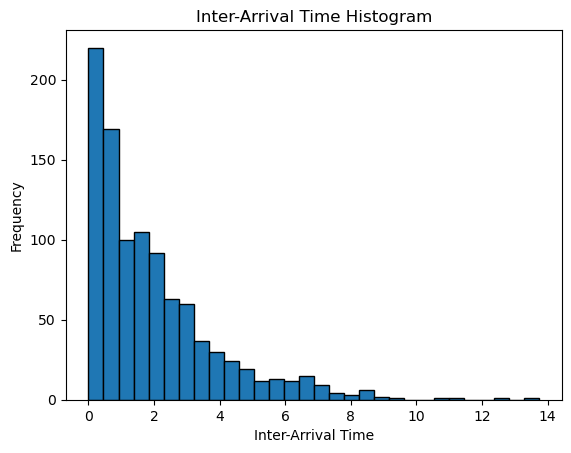

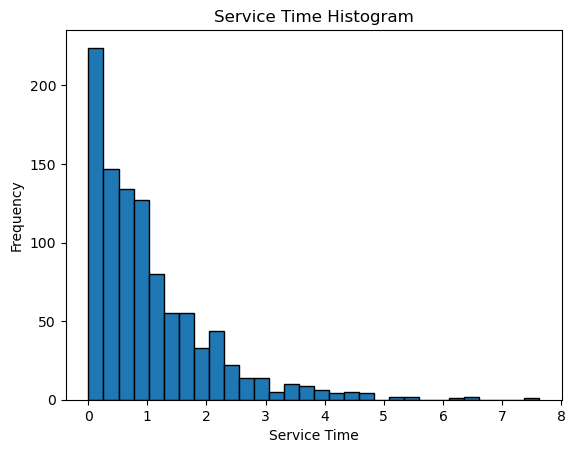

Rho: 0.6
Customer 1:
  Arrival Time: 0.5108
  Inter-Arrival Time: 0.5108
  Service Time: 0.6025
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 1.3177
  Inter-Arrival Time: 0.8069
  Service Time: 4.7633
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 5.3272
  Inter-Arrival Time: 4.0095
  Service Time: 0.5971
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 4:
  Arrival Time: 5.9738
  Inter-Arrival Time: 0.6467
  Service Time: 0.0703
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 5:
  Arrival Time: 6.5412
  Inter-Arrival Time: 0.5674
  Service Time: 0.3891
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 7.0815
  Inter-Arrival Time: 0.5403
  Service Time: 0.7413
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 7.4734
  

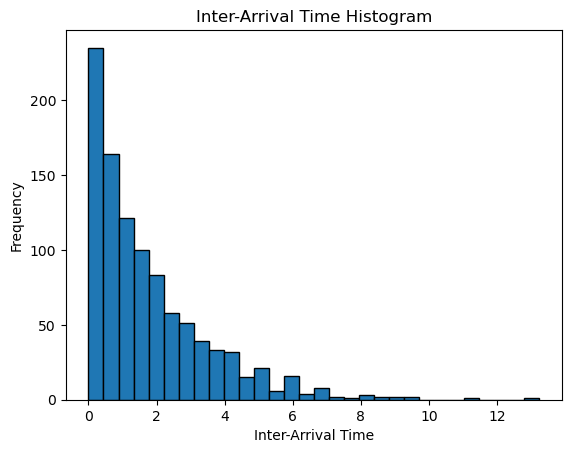

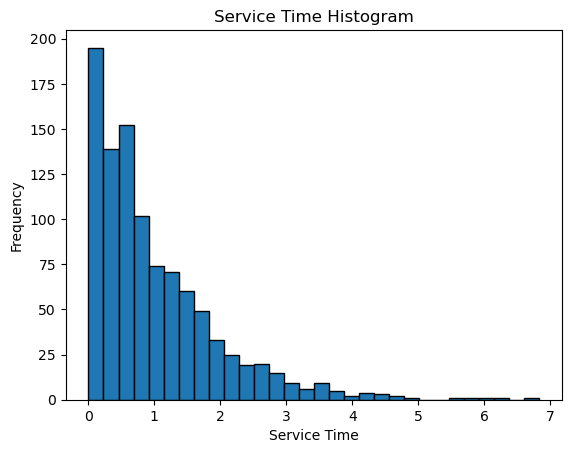

Rho: 0.7
Customer 1:
  Arrival Time: 0.0435
  Inter-Arrival Time: 0.0435
  Service Time: 0.8824
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 0.9740
  Inter-Arrival Time: 0.9306
  Service Time: 4.0744
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 2.6771
  Inter-Arrival Time: 1.7031
  Service Time: 0.4099
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 4:
  Arrival Time: 3.4162
  Inter-Arrival Time: 0.7391
  Service Time: 0.0984
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 5:
  Arrival Time: 8.0492
  Inter-Arrival Time: 4.6330
  Service Time: 0.1868
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 8.4037
  Inter-Arrival Time: 0.3545
  Service Time: 2.4593
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 9.7953
  

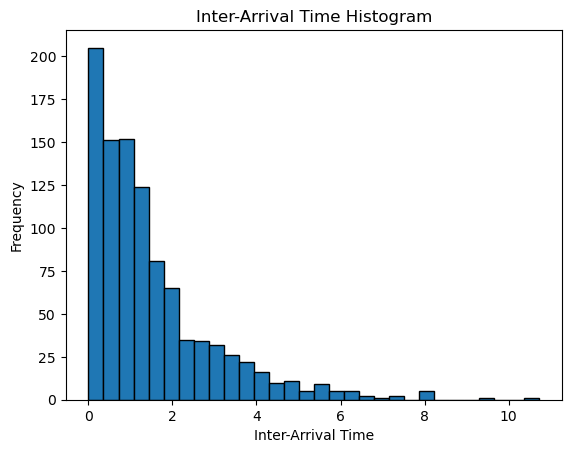

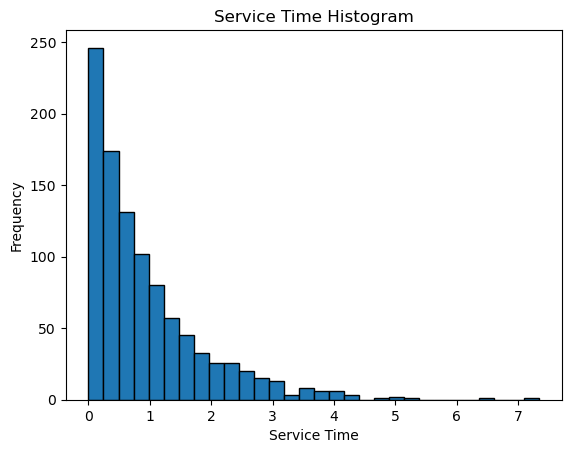

Rho: 0.8
Customer 1:
  Arrival Time: 0.3466
  Inter-Arrival Time: 0.3466
  Service Time: 0.6889
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 2:
  Arrival Time: 5.4263
  Inter-Arrival Time: 5.0797
  Service Time: 1.0440
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 7.0125
  Inter-Arrival Time: 1.5862
  Service Time: 1.1787
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 4:
  Arrival Time: 7.2880
  Inter-Arrival Time: 0.2756
  Service Time: 3.5088
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 5:
  Arrival Time: 8.4838
  Inter-Arrival Time: 1.1958
  Service Time: 0.3864
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 8.6664
  Inter-Arrival Time: 0.1826
  Service Time: 1.7565
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 9.8249
  

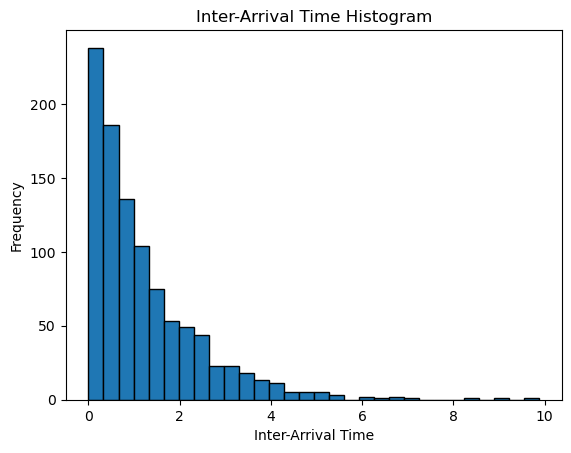

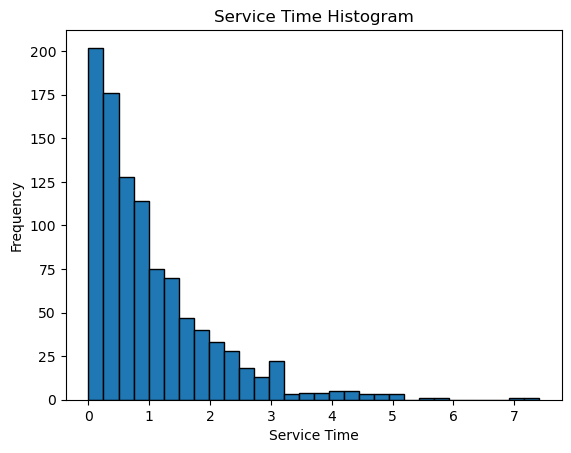

In [56]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

# Function to run the M/M/1 simulation
def mm1_simulation(env, arrival_rate, service_rate, num_customers):
    inter_arrival_times = np.random.exponential(1/arrival_rate, num_customers)
    service_times = np.random.exponential(1/service_rate, num_customers)
    
    queue_length = 0
    total_waiting_time = 0
    total_time_in_system = 0
    
    for i in range(num_customers):
        yield env.timeout(inter_arrival_times[i])
        
        arrival_time = env.now
        service_start_time = max(arrival_time, queue_length)
        service_end_time = service_start_time + service_times[i]
        
        waiting_time = service_start_time - arrival_time
        total_waiting_time += waiting_time
        
        total_time_in_system += service_times[i] + waiting_time
        
        queue_length += 1
        
        print(f"Customer {i + 1}:")
        print(f"  Arrival Time: {arrival_time:.4f}")
        print(f"  Inter-Arrival Time: {inter_arrival_times[i]:.4f}")
        print(f"  Service Time: {service_times[i]:.4f}")
        print(f"  Waiting Time: {waiting_time:.4f}")
        print(f"  Customers in Queue: {queue_length}")
        print("------------------------")
        
        queue_length -= 1
    
    avg_queue_length = total_time_in_system / env.now
    avg_waiting_time = total_waiting_time / num_customers
    avg_time_in_system = total_time_in_system / num_customers
    
    print(f"Simulated Average Queue Length: {avg_queue_length:.4f}")
    print(f"Simulated Average Waiting Time: {avg_waiting_time:.4f}")
    print(f"Simulated Average Time in System: {avg_time_in_system:.4f}")
    print("\n")

# Function to plot the histogram of inter-arrival times and service times
def plot_histogram(data, title, xlabel, ylabel):
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Main simulation loop
for rho in np.arange(0.1, 0.81, 0.1):
    print(f"Rho: {rho:.1f}")
    
    env = simpy.Environment()
    arrival_rate = rho
    service_rate = 1.0
    num_customers = 15
    
    env.process(mm1_simulation(env, arrival_rate, service_rate, num_customers))
    env.run()
    
    # Plot inter-arrival time and service time histograms
    inter_arrival_times = np.random.exponential(1/arrival_rate, 1000)
    service_times = np.random.exponential(1/service_rate, 1000)
    
    plot_histogram(inter_arrival_times, 'Inter-Arrival Time Histogram', 'Inter-Arrival Time', 'Frequency')
    plot_histogram(service_times, 'Service Time Histogram', 'Service Time', 'Frequency')


In [98]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

class MM1System:
    def __init__(self, env, arrival_rate, service_rate, num_customers):
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.num_customers = num_customers
        self.queue_length = 0
        self.total_waiting_time = 0
        self.total_time_in_system = 0
        self.customer_data = []

    def customer_arrival(self, customer):
        arrival_time = self.env.now
        service_start_time = max(arrival_time, self.queue_length)
        service_time = np.random.exponential(1/self.service_rate)

        waiting_time = (service_start_time + service_time )- arrival_time
        self.total_waiting_time += waiting_time
        self.total_time_in_system += service_time + waiting_time

        customer_info = {
            'Customer': len(self.customer_data) + 1,
            'Arrival Time': arrival_time,
            'Inter-Arrival Time': customer['inter_arrival_time'],
            'Service Time': service_time,
            'Waiting Time': waiting_time,
            'Customers in Queue': self.queue_length
        }
        self.customer_data.append(customer_info)

        print(f"Customer {customer_info['Customer']}:")
        print(f"  Arrival Time: {customer_info['Arrival Time']:.4f}")
        print(f"  Inter-Arrival Time: {customer_info['Inter-Arrival Time']:.4f}")
        print(f"  Service Time: {customer_info['Service Time']:.4f}")
        print(f"  Waiting Time: {customer_info['Waiting Time']:.4f}")
        print(f"  Customers in Queue: {customer_info['Customers in Queue']}")
        print("------------------------")

        self.queue_length += 1

        yield self.env.timeout(service_time)

        self.queue_length -= 1

    def run_simulation(self):
        inter_arrival_times = np.random.exponential(1/self.arrival_rate, self.num_customers)
        for i in range(self.num_customers):
            yield self.env.timeout(inter_arrival_times[i])
            customer = {'inter_arrival_time': inter_arrival_times[i]}
            self.env.process(self.customer_arrival(customer))

# Function to calculate performance metrics
def calculate_metrics(customer_data, num_customers, rho):
    L = np.mean([entry['Customers in Queue'] + 1 for entry in customer_data])
    LQ = np.mean([max(entry['Customers in Queue'], 0) for entry in customer_data])
    w = np.mean([entry['Service Time'] + entry['Waiting Time'] for entry in customer_data])
    wQ = np.mean([max(entry['Waiting Time'], 0) for entry in customer_data])

    theoretical_L = rho / (1 - rho)
    theoretical_LQ = (rho ** 2) / (1 - rho)
    theoretical_w = 1 / (service_rate - arrival_rate)
    theoretical_wQ = rho / (service_rate - arrival_rate)

    print(f"Simulated L: {L:.4f}, Theoretical L: {theoretical_L:.4f}")
    print(f"Simulated LQ: {LQ:.4f}, Theoretical LQ: {theoretical_LQ:.4f}")
    print(f"Simulated w: {w:.4f}, Theoretical w: {theoretical_w:.4f}")
    print(f"Simulated wQ: {wQ:.4f}, Theoretical wQ: {theoretical_wQ:.4f}")

# Main simulation loop
for rho in np.arange(0.1, 0.81, 0.1):
    print(f"Rho: {rho:.1f}")
    
    env = simpy.Environment()
    arrival_rate = rho
    service_rate = 1.0
    num_customers = 15
    
    mm1_system = MM1System(env, arrival_rate, service_rate, num_customers)
    env.process(mm1_system.run_simulation())
    env.run()

    calculate_metrics(mm1_system.customer_data, num_customers, rho)

    print("\n")

Rho: 0.1
Customer 1:
  Arrival Time: 5.2653
  Inter-Arrival Time: 5.2653
  Service Time: 0.3207
  Waiting Time: 0.3207
  Customers in Queue: 0
------------------------
Customer 2:
  Arrival Time: 7.1005
  Inter-Arrival Time: 1.8352
  Service Time: 0.3005
  Waiting Time: 0.3005
  Customers in Queue: 0
------------------------
Customer 3:
  Arrival Time: 10.3502
  Inter-Arrival Time: 3.2497
  Service Time: 3.9072
  Waiting Time: 3.9072
  Customers in Queue: 0
------------------------
Customer 4:
  Arrival Time: 22.8987
  Inter-Arrival Time: 12.5485
  Service Time: 1.7758
  Waiting Time: 1.7758
  Customers in Queue: 0
------------------------
Customer 5:
  Arrival Time: 27.2027
  Inter-Arrival Time: 4.3040
  Service Time: 2.3407
  Waiting Time: 2.3407
  Customers in Queue: 0
------------------------
Customer 6:
  Arrival Time: 29.2266
  Inter-Arrival Time: 2.0238
  Service Time: 0.2026
  Waiting Time: 0.2026
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 33.1

Rho: 0.1
Customer 1:
  Arrival Time: 12.7393
  Inter-Arrival Time: 12.7393
  Service Time: 0.2935
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 2:
  Arrival Time: 12.7449
  Inter-Arrival Time: 0.0056
  Service Time: 1.8790
  Waiting Time: 0.2879
  Customers in Queue: 1
------------------------
Customer 3:
  Arrival Time: 73.0346
  Inter-Arrival Time: 60.2897
  Service Time: 0.5916
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 4:
  Arrival Time: 93.3269
  Inter-Arrival Time: 20.2923
  Service Time: 2.1601
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 5:
  Arrival Time: 93.5901
  Inter-Arrival Time: 0.2632
  Service Time: 0.2930
  Waiting Time: 1.8969
  Customers in Queue: 1
------------------------
Customer 6:
  Arrival Time: 95.1111
  Inter-Arrival Time: 1.5210
  Service Time: 0.4716
  Waiting Time: 0.0000
  Customers in Queue: 1
------------------------
Customer 7:
  Arrival Time: 

------------------------
Customer 1484:
  Arrival Time: 7782.3709
  Inter-Arrival Time: 1.6546
  Service Time: 0.2605
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 1485:
  Arrival Time: 7789.0904
  Inter-Arrival Time: 6.7195
  Service Time: 0.0975
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 1486:
  Arrival Time: 7794.3821
  Inter-Arrival Time: 5.2917
  Service Time: 0.4680
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 1487:
  Arrival Time: 7799.3235
  Inter-Arrival Time: 4.9414
  Service Time: 2.3260
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 1488:
  Arrival Time: 7803.5548
  Inter-Arrival Time: 4.2313
  Service Time: 0.5839
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 1489:
  Arrival Time: 7807.6094
  Inter-Arrival Time: 4.0546
  Service Time: 0.5178
  Waiting Time: 0.0000
  Customers in Queue: 0
----------

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Customer 2026:
  Arrival Time: 2520.2309
  Inter-Arrival Time: 2.1870
  Service Time: 0.7118
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 2027:
  Arrival Time: 2520.8083
  Inter-Arrival Time: 0.5774
  Service Time: 0.5211
  Waiting Time: 0.1345
  Customers in Queue: 1
------------------------
Customer 2028:
  Arrival Time: 2521.1592
  Inter-Arrival Time: 0.3509
  Service Time: 0.1800
  Waiting Time: 0.1702
  Customers in Queue: 1
------------------------
Customer 2029:
  Arrival Time: 2524.4752
  Inter-Arrival Time: 3.3160
  Service Time: 0.2187
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 2030:
  Arrival Time: 2525.2843
  Inter-Arrival Time: 0.8091
  Service Time: 1.3350
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 2031:
  Arrival Time: 2527.0300
  Inter-Arrival Time: 1.7457
  Service Time: 0.6493
  Waiting Time: 0.0000
  Customers in Queue: 0
------------------------
Customer 2

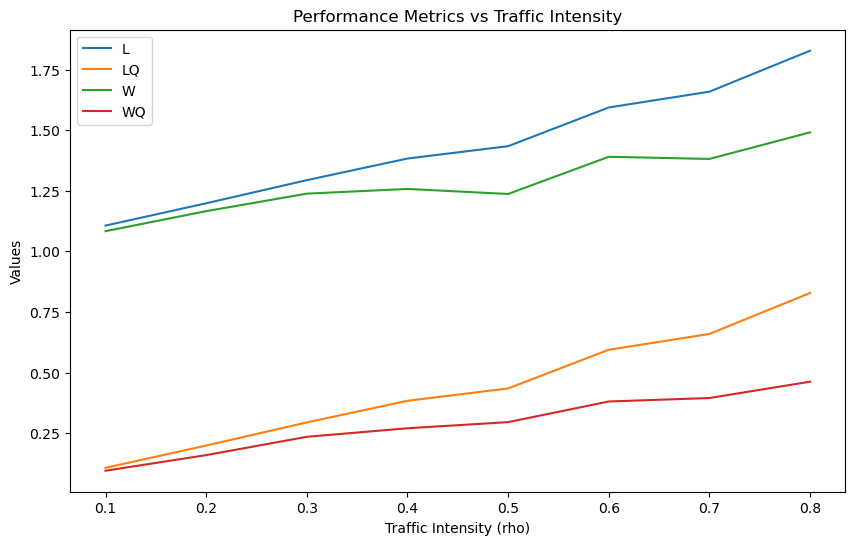

In [102]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

class MM1System:
    def __init__(self, env, arrival_rate, service_rate, num_customers):
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.num_customers = num_customers
        self.queue_length = 0
        self.total_waiting_time = 0
        self.total_time_in_system = 0
        self.customer_data = []

    def customer_arrival(self, customer):
        arrival_time = self.env.now

        # Calculate service start time as the maximum of arrival time and time when the queue becomes empty
        service_start_time = max(arrival_time, self.queue_length)

        # Retrieve the arrival time and service time of the previous customer
        if self.customer_data:
            previous_customer = self.customer_data[-1]
            previous_arrival_time = previous_customer['Arrival Time']
            previous_service_time = previous_customer['Service Time']

            # Calculate waiting time as the sum of arrival time and service time of the previous customer,
            # subtracted from the arrival time of the present customer
            waiting_time = (previous_arrival_time + previous_service_time) - arrival_time 
            waiting_time = max(0, waiting_time)
        else:
            # If there is no previous customer, waiting time is 0
            waiting_time = 0

        service_time = np.random.exponential(1 / self.service_rate)

        # Update the total waiting time and total time in the system
        self.total_waiting_time += waiting_time
        self.total_time_in_system += service_time + waiting_time

        customer_info = {
            'Customer': len(self.customer_data) + 1,
            'Arrival Time': arrival_time,
            'Inter-Arrival Time': customer['inter_arrival_time'],
            'Service Time': service_time,
            'Waiting Time': waiting_time,
            'Customers in Queue': self.queue_length
        }
        self.customer_data.append(customer_info)

        print(f"Customer {customer_info['Customer']}:")
        print(f"  Arrival Time: {customer_info['Arrival Time']:.4f}")
        print(f"  Inter-Arrival Time: {customer_info['Inter-Arrival Time']:.4f}")
        print(f"  Service Time: {customer_info['Service Time']:.4f}")
        print(f"  Waiting Time: {customer_info['Waiting Time']:.4f}")
        print(f"  Customers in Queue: {customer_info['Customers in Queue']}")
        print("------------------------")

        self.queue_length += 1

        yield self.env.timeout(service_time)

        self.queue_length -= 1

    def run_simulation(self):
        inter_arrival_times = np.random.exponential(1/self.arrival_rate, self.num_customers)
        for i in range(self.num_customers):
            yield self.env.timeout(inter_arrival_times[i])
            customer = {'inter_arrival_time': inter_arrival_times[i]}
            self.env.process(self.customer_arrival(customer))

# Function to calculate performance metrics
def calculate_metrics(customer_data, num_customers, rho):
    L = np.mean([entry['Customers in Queue'] + 1 for entry in customer_data])
    LQ = np.mean([max(entry['Customers in Queue'], 0) for entry in customer_data])
    w = np.mean([entry['Service Time'] + entry['Waiting Time'] for entry in customer_data])
    wQ = np.mean([max(entry['Waiting Time'], 0) for entry in customer_data])

    return L, LQ, w, wQ

# Main simulation loop
rhos = np.arange(0.1, 0.81, 0.1)
L_values, LQ_values, w_values, wQ_values = [], [], [], []

for rho in rhos:
    print(f"Rho: {rho:.1f}")
    
    env = simpy.Environment()
    arrival_rate = rho * service_rate  # Calculate arrival rate based on rho
    num_customers = 4000
    
    mm1_system = MM1System(env, arrival_rate, service_rate, num_customers)
    env.process(mm1_system.run_simulation())
    env.run()

    L, LQ, w, wQ = calculate_metrics(mm1_system.customer_data, num_customers, rho)
    theoretical_L = rho / (1 - rho)
    theoretical_LQ = (rho ** 2) / (1 - rho)
    theoretical_w = 1 / (service_rate - arrival_rate)
    theoretical_wQ = rho / (service_rate - arrival_rate)

    print(f"Simulated L: {L:.4f}, Theoretical L: {theoretical_L:.4f}")
    print(f"Simulated LQ: {LQ:.4f}, Theoretical LQ: {theoretical_LQ:.4f}")
    print(f"Simulated w: {w:.4f}, Theoretical w: {theoretical_w:.4f}")
    print(f"Simulated wQ: {wQ:.4f}, Theoretical wQ: {theoretical_wQ:.4f}")
    L_values.append(L)
    LQ_values.append(LQ)
    w_values.append(w)
    wQ_values.append(wQ)

    print("\n")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rhos, L_values, label='L')
plt.plot(rhos, LQ_values, label='LQ')
plt.plot(rhos, w_values, label='W')
plt.plot(rhos, wQ_values, label='WQ')

plt.xlabel('Traffic Intensity (rho)')
plt.ylabel('Values')
plt.title('Performance Metrics vs Traffic Intensity')
plt.legend()
plt.show()


Rho: 0.1
Simulated L: 1.0950, Theoretical L: 0.1111
Simulated LQ: 0.0950, Theoretical LQ: 0.0111
Simulated w: 1.1022, Theoretical w: 1.1111
Simulated wQ: 0.0865, Theoretical wQ: 0.1111


Rho: 0.2
Simulated L: 1.1985, Theoretical L: 0.2500
Simulated LQ: 0.1985, Theoretical LQ: 0.0500
Simulated w: 1.1764, Theoretical w: 1.2500
Simulated wQ: 0.1740, Theoretical wQ: 0.2500


Rho: 0.3
Simulated L: 1.3033, Theoretical L: 0.4286
Simulated LQ: 0.3033, Theoretical LQ: 0.1286
Simulated w: 1.2429, Theoretical w: 1.4286
Simulated wQ: 0.2374, Theoretical wQ: 0.4286


Rho: 0.4
Simulated L: 1.4175, Theoretical L: 0.6667
Simulated LQ: 0.4175, Theoretical LQ: 0.2667
Simulated w: 1.2828, Theoretical w: 1.6667
Simulated wQ: 0.2890, Theoretical wQ: 0.6667


Rho: 0.5
Simulated L: 1.4955, Theoretical L: 1.0000
Simulated LQ: 0.4955, Theoretical LQ: 0.5000
Simulated w: 1.3390, Theoretical w: 2.0000
Simulated wQ: 0.3335, Theoretical wQ: 1.0000


Rho: 0.6
Simulated L: 1.5933, Theoretical L: 1.5000
Simulated LQ:

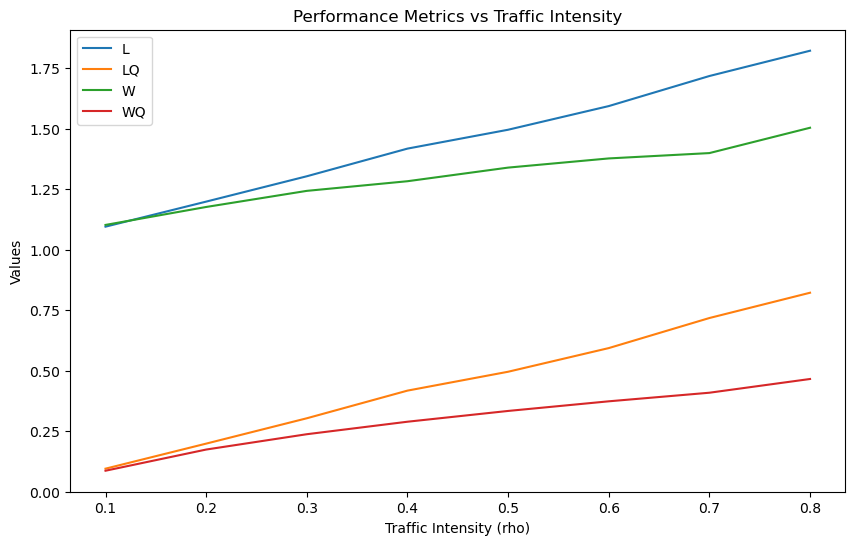

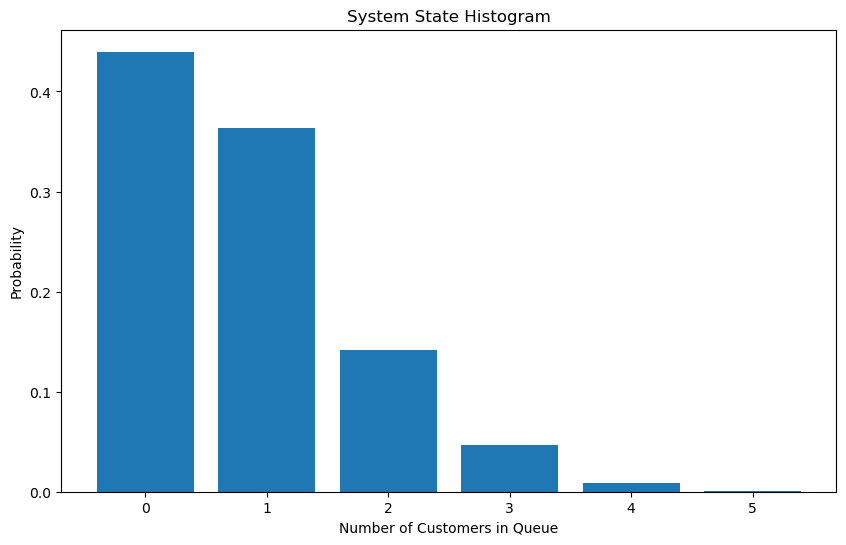

In [103]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

class MM1System:
    def __init__(self, env, arrival_rate, service_rate, num_customers):
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.num_customers = num_customers
        self.queue_length = 0
        self.total_waiting_time = 0
        self.total_time_in_system = 0
        self.customer_data = []
        self.system_states = []  # List to store system state at different time points

    def customer_arrival(self, customer):
        arrival_time = self.env.now

        # Calculate service start time as the maximum of arrival time and time when the queue becomes empty
        service_start_time = max(arrival_time, self.queue_length)

        # Retrieve the arrival time and service time of the previous customer
        if self.customer_data:
            previous_customer = self.customer_data[-1]
            previous_arrival_time = previous_customer['Arrival Time']
            previous_service_time = previous_customer['Service Time']

            # Calculate waiting time as the sum of arrival time and service time of the previous customer,
            # subtracted from the arrival time of the present customer
            waiting_time = (previous_arrival_time + previous_service_time) - arrival_time 
            waiting_time = max(0, waiting_time)
        else:
            # If there is no previous customer, waiting time is 0
            waiting_time = 0

        service_time = np.random.exponential(1 / self.service_rate)

        # Update the total waiting time and total time in the system
        self.total_waiting_time += waiting_time
        self.total_time_in_system += service_time + waiting_time

        customer_info = {
            'Customer': len(self.customer_data) + 1,
            'Arrival Time': arrival_time,
            'Inter-Arrival Time': customer['inter_arrival_time'],
            'Service Time': service_time,
            'Waiting Time': waiting_time,
            'Customers in Queue': self.queue_length
        }
        self.customer_data.append(customer_info)
        
        # Record the system state at the current time
        self.system_states.append((self.env.now, self.queue_length))

        self.queue_length += 1

        yield self.env.timeout(service_time)

        self.queue_length -= 1

    def run_simulation(self):
        inter_arrival_times = np.random.exponential(1/self.arrival_rate, self.num_customers)
        for i in range(self.num_customers):
            yield self.env.timeout(inter_arrival_times[i])
            customer = {'inter_arrival_time': inter_arrival_times[i]}
            self.env.process(self.customer_arrival(customer))

# Function to calculate performance metrics
def calculate_metrics(customer_data, num_customers, rho):
    L = np.mean([entry['Customers in Queue'] + 1 for entry in customer_data])
    LQ = np.mean([max(entry['Customers in Queue'], 0) for entry in customer_data])
    w = np.mean([entry['Service Time'] + entry['Waiting Time'] for entry in customer_data])
    wQ = np.mean([max(entry['Waiting Time'], 0) for entry in customer_data])

    return L, LQ, w, wQ

# Main simulation loop
rhos = np.arange(0.1, 0.81, 0.1)
L_values, LQ_values, w_values, wQ_values = [], [], [], []

for rho in rhos:
    print(f"Rho: {rho:.1f}")
    
    env = simpy.Environment()
    arrival_rate = rho  # Calculate arrival rate based on rho
    num_customers = 4000
    service_rate = 1.0  # Set your desired service rate
    
    mm1_system = MM1System(env, arrival_rate, service_rate, num_customers)
    env.process(mm1_system.run_simulation())
    env.run()

    L, LQ, w, wQ = calculate_metrics(mm1_system.customer_data, num_customers, rho)
    theoretical_L = rho / (1 - rho)
    theoretical_LQ = (rho ** 2) / (1 - rho)
    theoretical_w = 1 / (service_rate - arrival_rate)
    theoretical_wQ = rho / (service_rate - arrival_rate)

    print(f"Simulated L: {L:.4f}, Theoretical L: {theoretical_L:.4f}")
    print(f"Simulated LQ: {LQ:.4f}, Theoretical LQ: {theoretical_LQ:.4f}")
    print(f"Simulated w: {w:.4f}, Theoretical w: {theoretical_w:.4f}")
    print(f"Simulated wQ: {wQ:.4f}, Theoretical wQ: {theoretical_wQ:.4f}")
    L_values.append(L)
    LQ_values.append(LQ)
    w_values.append(w)
    wQ_values.append(wQ)

    print("\n")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rhos, L_values, label='L')
plt.plot(rhos, LQ_values, label='LQ')
plt.plot(rhos, w_values, label='W')
plt.plot(rhos, wQ_values, label='WQ')

plt.xlabel('Traffic Intensity (rho)')
plt.ylabel('Values')
plt.title('Performance Metrics vs Traffic Intensity')
plt.legend()
plt.show()

# Plotting the system state histogram
time_points, system_states = zip(*mm1_system.system_states)
plt.figure(figsize=(10, 6))
plt.hist(system_states, bins=range(0, max(system_states) + 2), align='left', density=True, rwidth=0.8)
plt.xlabel('Number of Customers in Queue')
plt.ylabel('Probability')
plt.title('System State Histogram')
plt.show()
